In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency,stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,roc_curve
import toad
import warnings
warnings.filterwarnings('ignore')

In [2]:
import scorecardpy as sc
from sklearn.utils import shuffle

In [3]:
df_german = pd.read_excel('GermanCreditData.xlsx',sheet_name = 'Sheet1')

In [4]:
# Qn 1 - Split the subset into two based on checking 12 and 34
df_12 = df_german.query('Checking == 1 or Checking == 2')
df_34 = df_german.query('Checking == 3 or Checking == 4')

In [5]:
print(f'Length of Subset_12 : {len(df_12)}\nLength of Subset_34 : {len(df_34)}')

Length of Subset_12 : 543
Length of Subset_34 : 457


In [6]:
# Check for missing values in each subset
# There are no missing values in the subset.
df_12.isnull().sum()

Checking     0
Duration     0
History      0
Purpose      0
Amount       0
Savings      0
Emploed      0
Installp     0
marital      0
Coapp        0
Resident     0
Property     0
Age          0
Other        0
housing      0
Existcr      0
Job          0
Depends      0
Telephone    0
Foreign      0
Bad          0
Good         0
dtype: int64

In [7]:
df_34.isnull().sum()

Checking     0
Duration     0
History      0
Purpose      0
Amount       0
Savings      0
Emploed      0
Installp     0
marital      0
Coapp        0
Resident     0
Property     0
Age          0
Other        0
housing      0
Existcr      0
Job          0
Depends      0
Telephone    0
Foreign      0
Bad          0
Good         0
dtype: int64

In [8]:
# Map the colums to its type - categorical or numerical
col_names = list(df_german)
col_type = ['cat',  'num', 'cat',  'cat',  'num',  'cat','cat', 'num', 'cat', 'cat','num', 'cat',
            'num', 'cat',  'cat',  'num', 'cat',  'num', 'cat','cat',  'num' ,  'num']

In [9]:
col_cat = {}
for key,value in zip(col_names, col_type):
    col_cat.update({key : value})

In [10]:
df_col = pd.DataFrame.from_dict(col_cat, orient = 'index')

In [11]:
# Check for distinct values for each cols in subset12 and 34
for cols in col_cat.keys():
    if cols not in ['Duration','Amount','Age']:
        print(cols,df_12[cols].unique(), df_34[cols].unique())

Checking [1 2] [4 3]
History [4 2 3 0 1] [4 2 0 1 3]
Purpose [3 2 0 1 9 5 'X' 6 8 4] [6 2 3 0 9 4 1 5 8 'X']
Savings [5 1 2 3 4] [1 5 3 4 2]
Emploed [5 3 4 1 2] [4 3 5 2 1]
Installp [4 2 3 1] [2 3 4 1]
marital [3 2 4 1] [3 1 4 2]
Coapp [1 3 2] [1 2 3]
Resident [4 2 1 3] [3 4 2 1]
Property [1 2 4 3] [1 4 2 3]
Other [3 1 2] [3 1 2]
housing [2 3 1] [2 3 1]
Existcr [2 1 3 4] [1 2 3 4]
Job [3 4 2 1] [2 3 4 1]
Depends [1 2] [2 1]
Telephone [2 1] [1 2]
Foreign [1 2] [1 2]
Bad [0 1] [0 1]
Good [1 0] [1 0]


In [12]:
# We could see in both subset that there is 'X' in the purpose attribute.
lenX_in_df12 = len(df_12.query('Purpose == "X"'))
lenX_in_df34 = len(df_34.query('Purpose == "X"'))
print(lenX_in_df12,lenX_in_df34)

11 1


In [13]:
# Drop rows with Purpose X in both the susbets
df_12.drop(df_12[df_12.Purpose == 'X'].index , inplace = True)
df_34.drop(df_34[df_34.Purpose == 'X'].index, inplace = True)

In [14]:
lenX_in_df12 = len(df_12.query('Purpose == "X"'))
lenX_in_df34 = len(df_34.query('Purpose == "X"'))
print(lenX_in_df12,lenX_in_df34)

0 0


In [15]:
df_12.describe(percentiles = [.25,.5,.75,.95])

,Checking,Duration,History,Amount,Savings,Emploed,Installp,marital,Coapp,Resident,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,1.492481,21.774436,2.357143,3397.417293,1.832707,3.253759,2.977444,2.669173,1.201128,2.864662,...,34.584586,2.657895,1.907895,1.366541,2.875940,1.152256,1.372180,1.035714,0.441729,0.558271
std,0.500414,12.551283,1.073691,2910.619052,1.436746,1.226468,1.133075,0.736171,0.564951,1.121822,...,11.554440,0.723218,0.569942,0.574939,0.672029,0.359607,0.483841,0.185752,0.497060,0.497060
min,1.000000,6.000000,0.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,12.000000,2.000000,1350.250000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,26.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,18.000000,2.000000,2410.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,...,31.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,27.000000,3.000000,4243.000000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000,...,40.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000
95%,2.000000,48.000000,4.000000,9276.400000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,...,59.450000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,2.000000,72.000000,4.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,...,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [16]:
df_34.describe(percentiles = [.25,.5,.75,.95])

,Checking,Duration,History,Amount,Savings,Emploed,Installp,marital,Coapp,Resident,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,3.861842,19.585526,2.769737,2994.122807,2.429825,3.546053,2.975877,2.699561,1.070175,2.811404,...,36.552632,2.719298,1.942982,1.451754,2.921053,1.157895,1.427632,1.037281,0.131579,0.868421
std,0.345445,11.118608,1.047050,2442.427010,1.679714,1.153145,1.106161,0.675863,0.323967,1.089188,...,11.072859,0.659787,0.479280,0.579766,0.613328,0.365043,0.495278,0.189657,0.338404,0.338404
min,3.000000,4.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,12.000000,2.000000,1385.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,...,28.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,4.000000,18.000000,2.000000,2178.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,...,35.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,4.000000,24.000000,4.000000,3598.500000,4.000000,5.000000,4.000000,3.000000,1.000000,4.000000,...,43.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000
95%,4.000000,39.750000,4.000000,8246.750000,5.000000,5.000000,4.000000,4.000000,1.250000,4.000000,...,59.250000,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,1.000000,1.000000
max,4.000000,60.000000,4.000000,15653.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,...,74.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [17]:
print(df_12.Duration.quantile(.25), df_12.Duration.quantile(.75))
print(df_12.Amount.quantile(.25), df_12.Amount.quantile(.75))
print(df_12.Age.quantile(.25), df_12.Age.quantile(.75))

print(df_34.Duration.quantile(.25), df_34.Duration.quantile(.75))
print(df_34.Amount.quantile(.25), df_34.Amount.quantile(.75))
print(df_34.Age.quantile(.25), df_34.Age.quantile(.75))

12.0 27.0
1350.25 4243.0
26.0 40.0
12.0 24.0
1385.0 3598.5
28.0 43.0


In [18]:
# Check for numerical outliers in the subsets
def check_outliers(col):
    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr 
    outlier = col[((col< lower) | (col>upper))]
    return outlier

In [19]:
print('Outliers counts in Checking 12 34')
for col,val in col_cat.items():
    if val == 'num' and col not in ['Good','Bad']:
        o = check_outliers(df_12[col])
        o2 = check_outliers(df_34[col])
        print(col , len(o), len(o2))

Outliers counts in Checking 12 34
Duration 9 19
Amount 31 39
Installp 0 0
Resident 0 0
Age 20 6
Existcr 4 2
Depends 81 72


Text(0.5, 1.0, 'Checking 34')

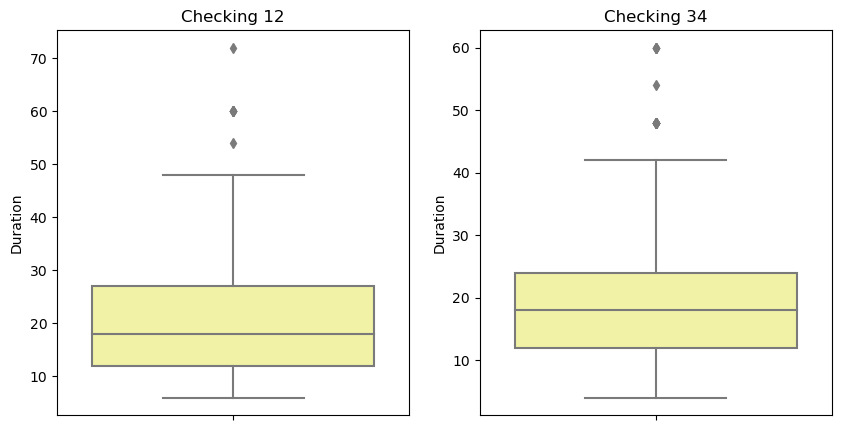

In [20]:
# Duration - outliers in both the subset
fig,axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y = 'Duration', data = df_12, ax = axes[0], palette='terrain_r')
sns.boxplot(y = 'Duration', data = df_34, ax = axes[1], palette = 'terrain_r')
axes[0].set_title('Checking 12')
axes[1].set_title('Checking 34')

Text(0.5, 1.0, 'Checking 34')

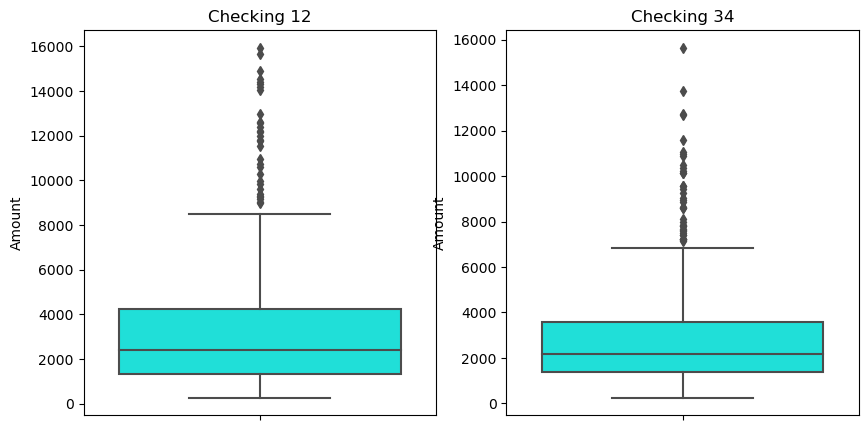

In [21]:
# Amount Outliers in both the subset
fig,axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y = 'Amount', data = df_12, ax = axes[0], palette='hsv')
sns.boxplot(y = 'Amount', data = df_34, ax = axes[1], palette = 'hsv')
axes[0].set_title('Checking 12')
axes[1].set_title('Checking 34')

Text(0.5, 1.0, 'Checking 34')

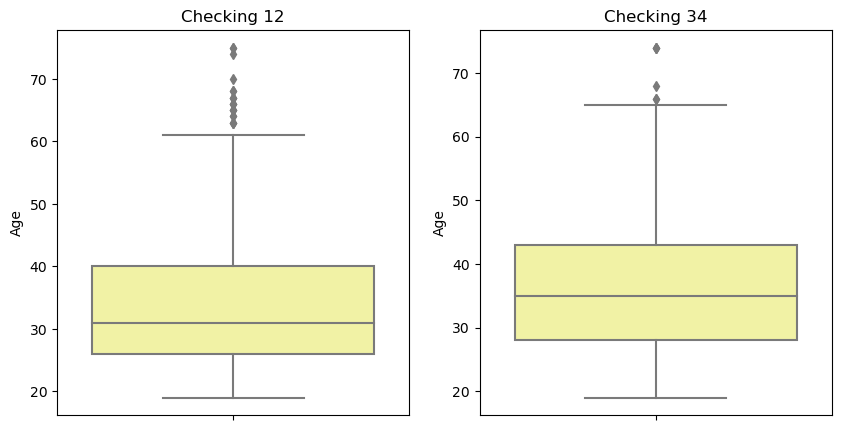

In [22]:
# Age - outliers in both the subset
fig,axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y = 'Age', data = df_12, ax = axes[0], palette='terrain_r')
sns.boxplot(y = 'Age', data = df_34, ax = axes[1], palette = 'terrain_r')
axes[0].set_title('Checking 12')
axes[1].set_title('Checking 34')

Text(0.5, 1.0, 'Checking 34')

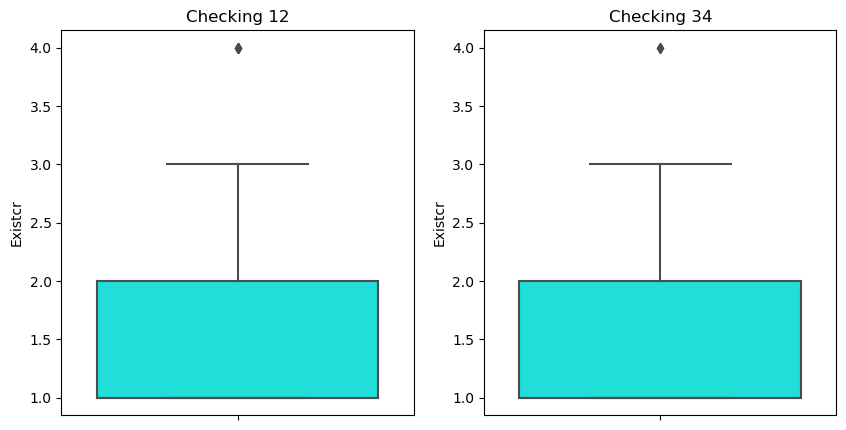

In [23]:
# Existcr - outliers in both the subset
fig,axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(y = 'Existcr', data = df_12, ax = axes[0], palette='hsv')
sns.boxplot(y = 'Existcr', data = df_34, ax = axes[1], palette = 'hsv')
axes[0].set_title('Checking 12')
axes[1].set_title('Checking 34')

In [24]:
# Impute outliers values with the respective 75th quantile values
for col,val in col_cat.items():
    if val == 'num' and col in ['Amount','Duration','Age','Existcr','Depends']:
        df12_q95 = df_12[col].quantile(.75)
        df34_q95 = df_34[col].quantile(.75)
        o1 = check_outliers(df_12[col])
        o2 = check_outliers(df_34[col])
        df_12[col].replace(list(o1),df12_q95, inplace = True)
        df_34[col].replace(list(o2),df34_q95, inplace = True)
        #df_12.drop(index = list(o1), inplace = True, axis = 0)
        #df_34.drop(o2.index, inplace = True)

# Assign the cleaned df to new df object
df_12_c = df_12
df_34_c = df_34       
print(f'Length of Subset 12-34 after cleaning {len(df_12)} - {len(df_34)}.')

Length of Subset 12-34 after cleaning 532 - 456.


In [25]:
df_12.Amount.mean()

2954.347744360902

In [26]:
df_12_c = shuffle(df_12_c, random_state = 42)
df_34_c = shuffle(df_34_c, random_state = 618)

<AxesSubplot:xlabel='Good', ylabel='count'>

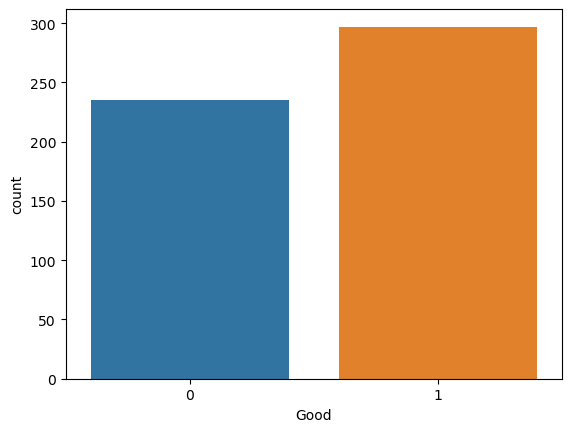

In [27]:
sns.countplot(x=df_12_c.Good)

In [28]:
print(len(df_12_c.query('Good == 1')) , len(df_12_c.query('Good == 0')))
print(297 + 235 == len(df_12_c))

297 235
True


<AxesSubplot:xlabel='Good', ylabel='count'>

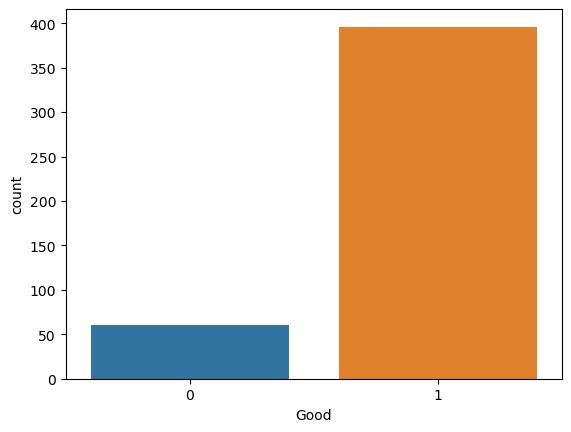

In [29]:
sns.countplot(x=df_34_c.Good)

In [30]:
print(len(df_34_c.query('Good == 1')) , len(df_34_c.query('Good == 0')))
print(396  + 60 == len(df_34_c))

396 60
True


In [31]:
len(df_34_c.query('Checking == 3'))

63

In [32]:
# Qn 2 - Split the subset into train/set based on the scorecardpy split_df method

Train_12, Test_12 = sc.split_df(df_12_c, y = 'Good', ratio = [0.7,0.3], seed = 42).values()
Train_34, Test_34 = sc.split_df(df_34_c, y = 'Good', ratio = [0.7,0.3], seed = 618).values()

In [33]:
print(Train_12.shape, Test_12.shape, Train_34.shape, Test_34.shape)

(372, 22) (160, 22) (319, 22) (137, 22)


In [34]:
# TO DO
# 1 - Handle outliers if needed - Done handled
X_cols = [c for c in col_names if c not in ['Good','Bad']]

In [35]:
# Qn 3 - Variable Selection for both subsets
cols_12 = []

for cols in X_cols:
    ct_check = pd.crosstab(Train_12[cols], Train_12['Good'])
    stat,p,dof,exp = chi2_contingency(ct_check)
    if p <= .05:
        res = 'Accepted'
    else:
        res = 'Rejected'
    d_item = {'cols' : cols, 'p_value' : p, 'type' : col_cat[cols], 'Result' : res, 'Stat' : stat}
    cols_12.append(d_item)
    
sel_12 = pd.DataFrame(cols_12)

In [36]:
sel_12.query('Result =="Accepted"').sort_values(by = ['Result','p_value'])

,cols,p_value,type,Result,Stat
11,Property,0.000208,cat,Accepted,19.578492
5,Savings,0.001205,cat,Accepted,18.053446
2,History,0.002933,cat,Accepted,16.065058
1,Duration,0.003480,num,Accepted,45.468957
14,housing,0.011055,cat,Accepted,9.009824
0,Checking,0.012315,cat,Accepted,6.264904
8,marital,0.018527,cat,Accepted,10.004640
3,Purpose,0.020152,cat,Accepted,18.146887
19,Foreign,0.043910,cat,Accepted,4.060001


In [37]:
cols

'Foreign'

In [38]:
cols_34 = []

for cols in X_cols:
    ct_check = pd.crosstab(Train_34[cols], Train_34['Good'])
    stat,p,dof,exp = chi2_contingency(ct_check)
    if p <= .05:
        res = 'Accepted'
    else:
        res = 'Rejected'
    d_item = {'cols' : cols, 'p_value' : p, 'type' : col_cat[cols], 'Result' : res}
    cols_34.append(d_item)
    
sel_34 = pd.DataFrame(cols_34)

In [39]:
sel_34.query('Result =="Accepted"').sort_values(by = ['Result','p_value'])

,cols,p_value,type,Result
13,Other,0.000746,cat,Accepted
3,Purpose,0.000912,cat,Accepted
2,History,0.011620,cat,Accepted
6,Emploed,0.048443,cat,Accepted


In [40]:
cols = [c for c in Train_12.columns if c != 'Purpose']

[INFO] creating woe binning ...


{'Other': <Figure size 640x480 with 2 Axes>,
 'marital': <Figure size 640x480 with 2 Axes>,
 'Duration': <Figure size 640x480 with 2 Axes>,
 'Installp': <Figure size 640x480 with 2 Axes>,
 'Property': <Figure size 640x480 with 2 Axes>,
 'Coapp': <Figure size 640x480 with 2 Axes>,
 'Job': <Figure size 640x480 with 2 Axes>,
 'History': <Figure size 640x480 with 2 Axes>,
 'Amount': <Figure size 640x480 with 2 Axes>,
 'Age': <Figure size 640x480 with 2 Axes>,
 'Emploed': <Figure size 640x480 with 2 Axes>,
 'Checking': <Figure size 640x480 with 2 Axes>,
 'Resident': <Figure size 640x480 with 2 Axes>,
 'housing': <Figure size 640x480 with 2 Axes>,
 'Foreign': <Figure size 640x480 with 2 Axes>,
 'Existcr': <Figure size 640x480 with 2 Axes>,
 'Bad': <Figure size 640x480 with 2 Axes>,
 'Telephone': <Figure size 640x480 with 2 Axes>,
 'Savings': <Figure size 640x480 with 2 Axes>}

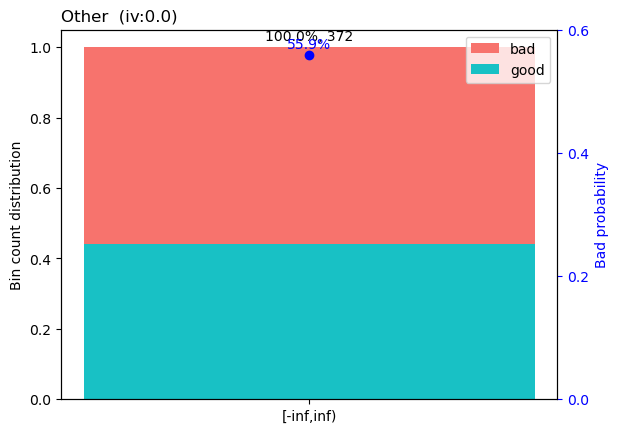

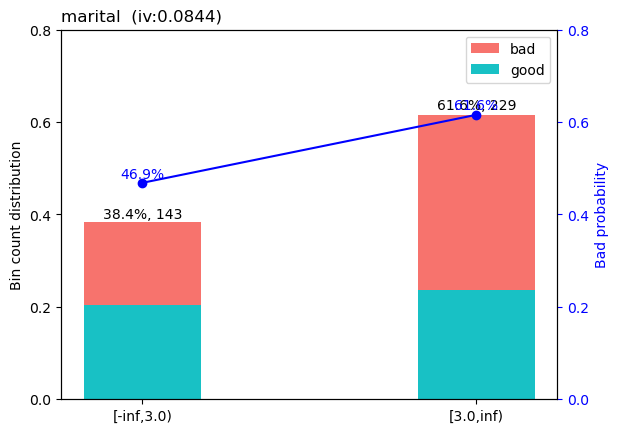

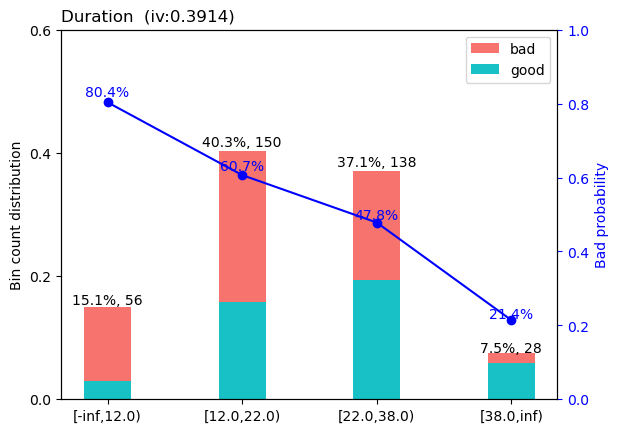

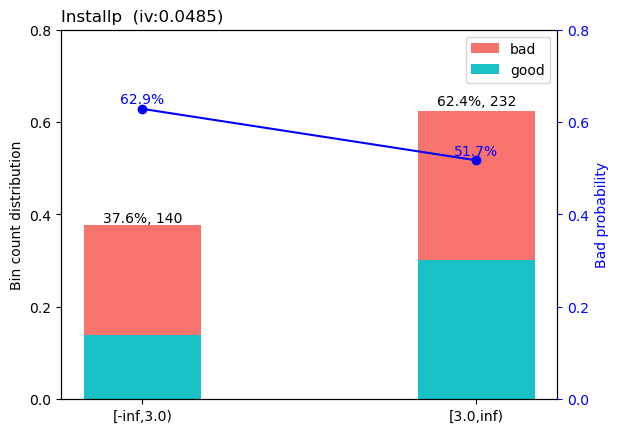

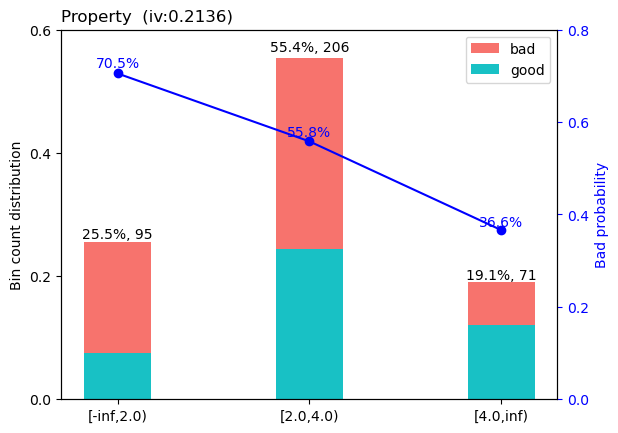

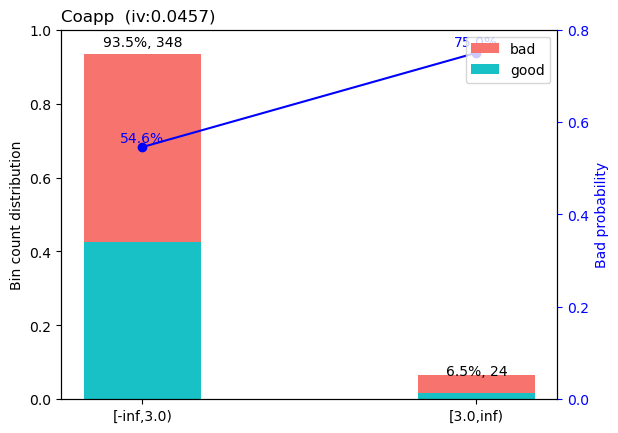

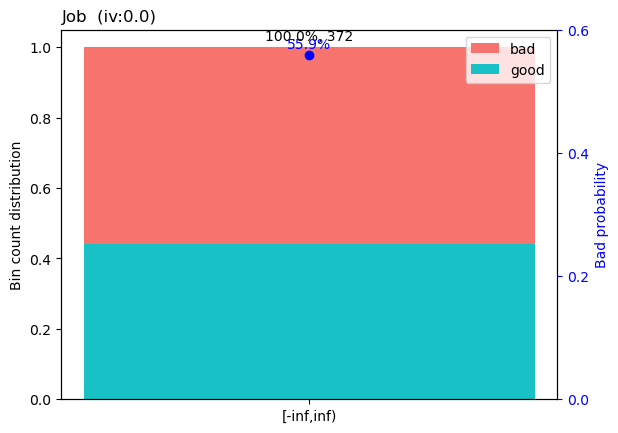

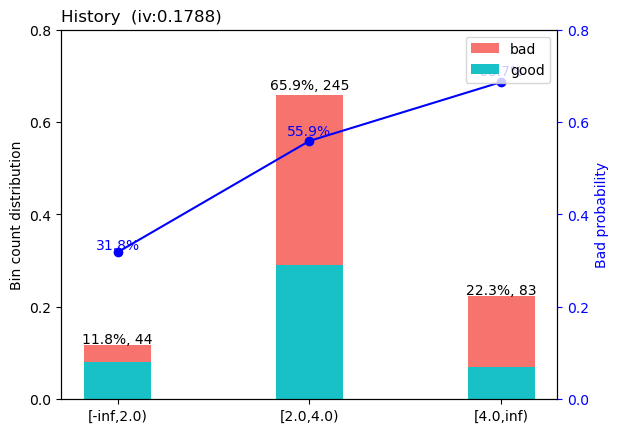

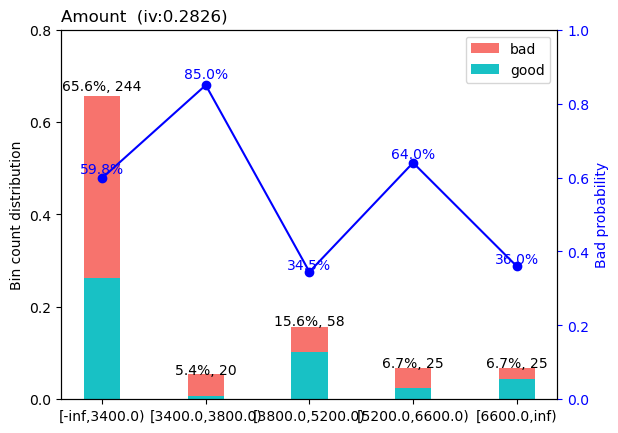

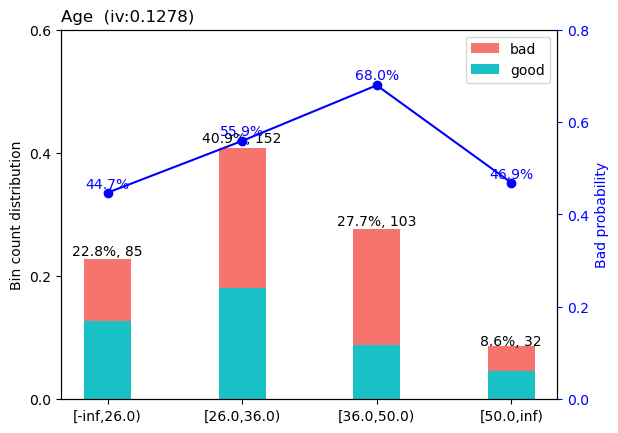

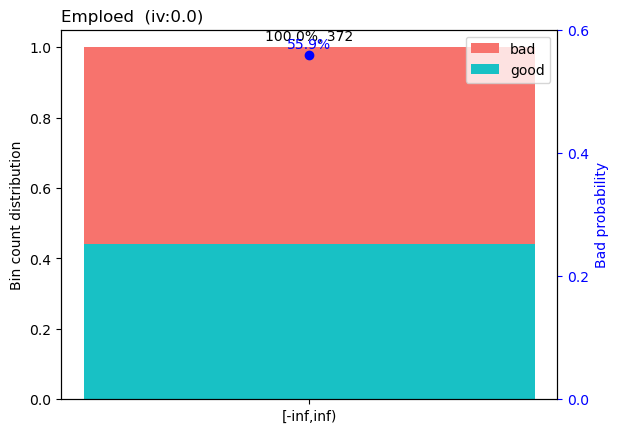

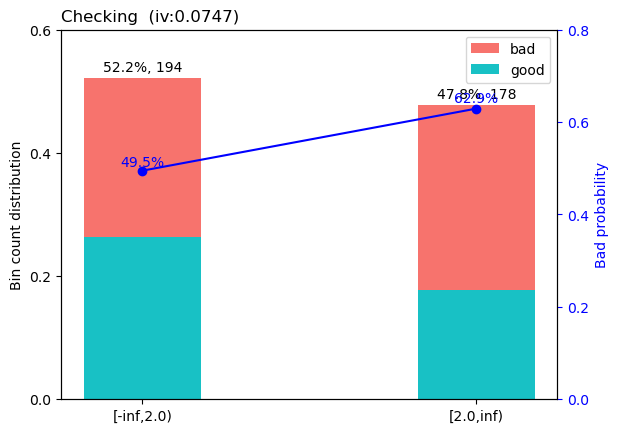

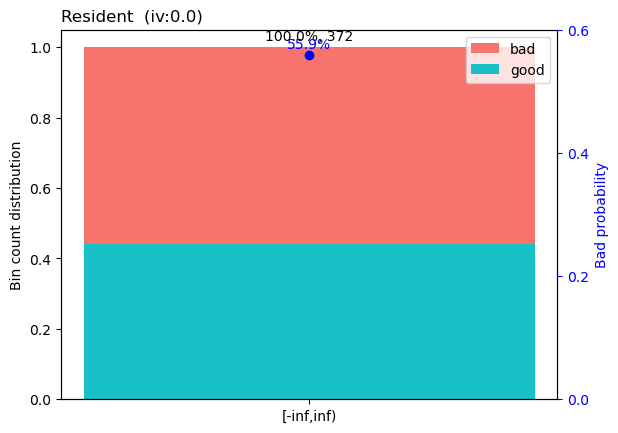

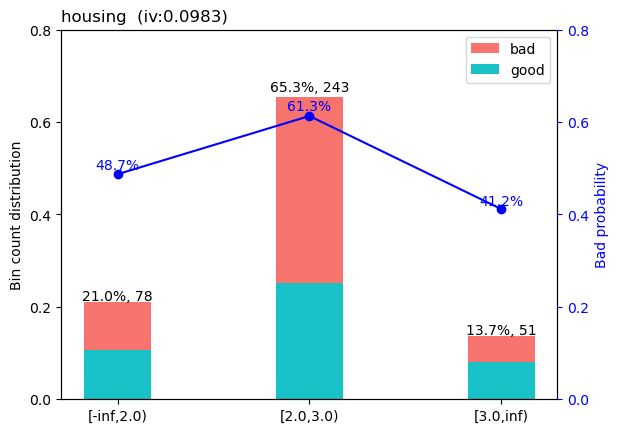

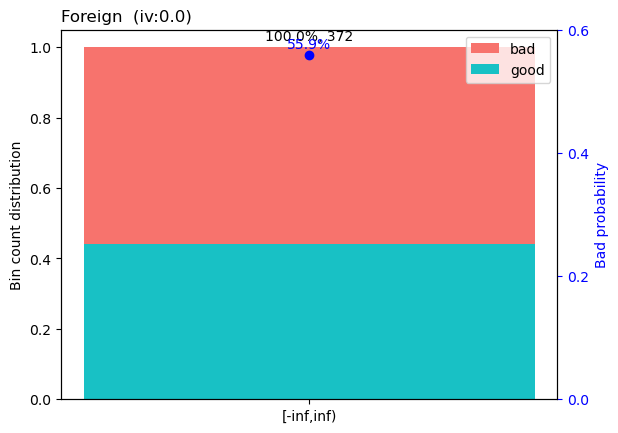

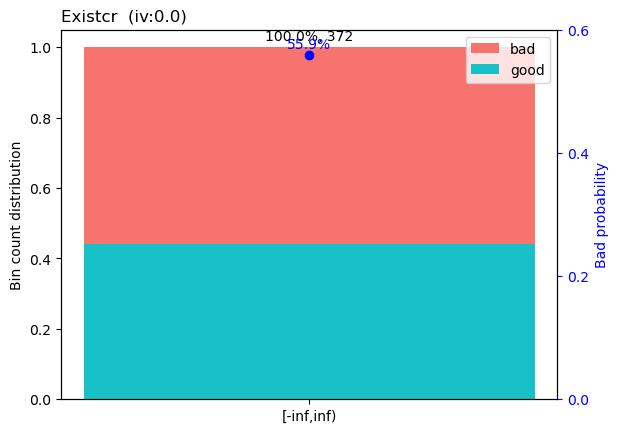

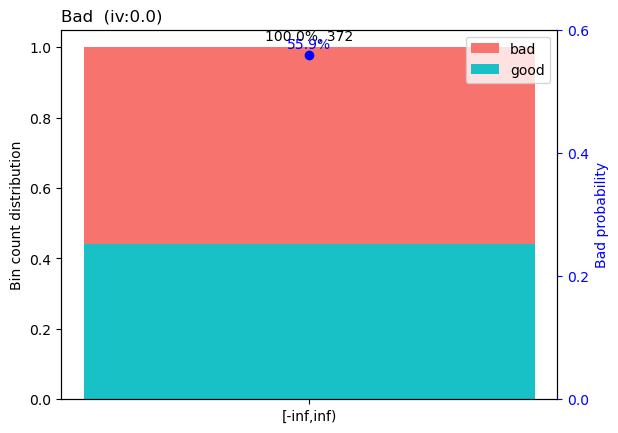

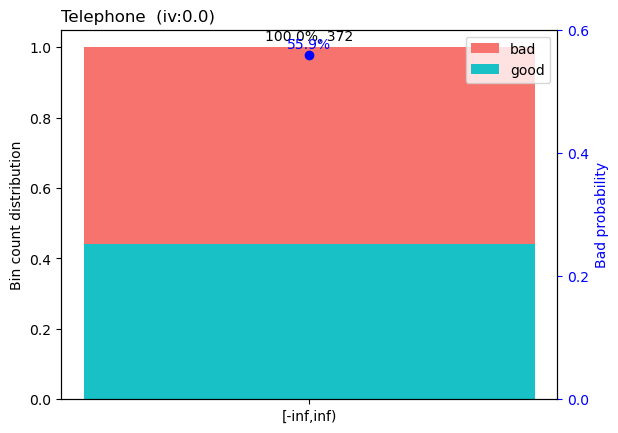

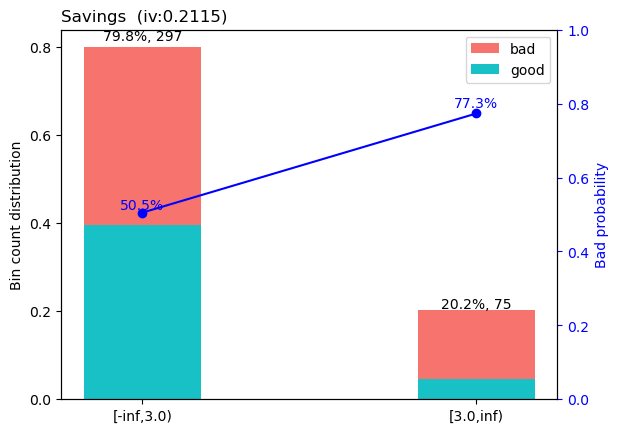

In [41]:
Train12_woe = sc.woebin(Train_12[cols], y="Good", method='chimerge', positive = 1)
sc.woebin_plot(Train12_woe)

In [42]:
#Train_12.to_excel('Train12.xlsx',sheet_name = 'Checking12')

[INFO] creating woe binning ...


{'Other': <Figure size 640x480 with 2 Axes>,
 'marital': <Figure size 640x480 with 2 Axes>,
 'Duration': <Figure size 640x480 with 2 Axes>,
 'Installp': <Figure size 640x480 with 2 Axes>,
 'Property': <Figure size 640x480 with 2 Axes>,
 'Coapp': <Figure size 640x480 with 2 Axes>,
 'Job': <Figure size 640x480 with 2 Axes>,
 'History': <Figure size 640x480 with 2 Axes>,
 'Amount': <Figure size 640x480 with 2 Axes>,
 'Age': <Figure size 640x480 with 2 Axes>,
 'Emploed': <Figure size 640x480 with 2 Axes>,
 'Checking': <Figure size 640x480 with 2 Axes>,
 'Resident': <Figure size 640x480 with 2 Axes>,
 'housing': <Figure size 640x480 with 2 Axes>,
 'Foreign': <Figure size 640x480 with 2 Axes>,
 'Existcr': <Figure size 640x480 with 2 Axes>,
 'Bad': <Figure size 640x480 with 2 Axes>,
 'Telephone': <Figure size 640x480 with 2 Axes>,
 'Savings': <Figure size 640x480 with 2 Axes>}

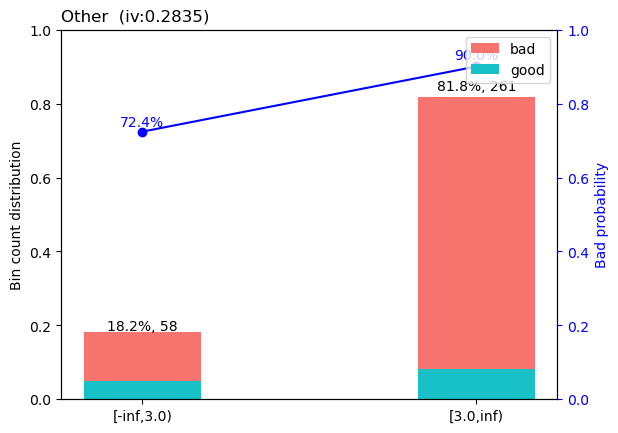

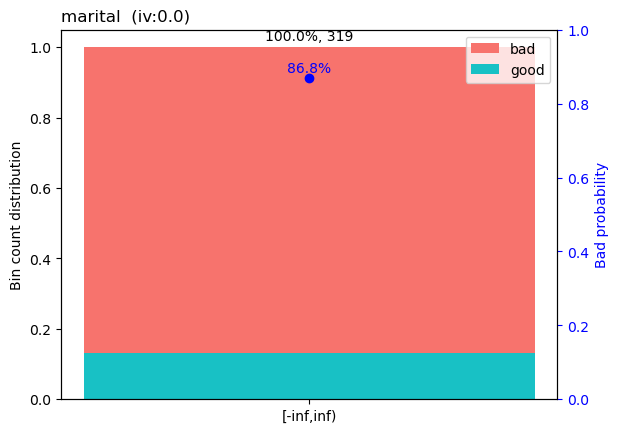

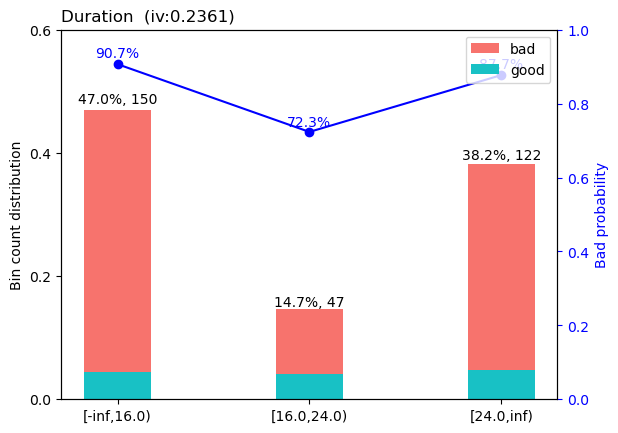

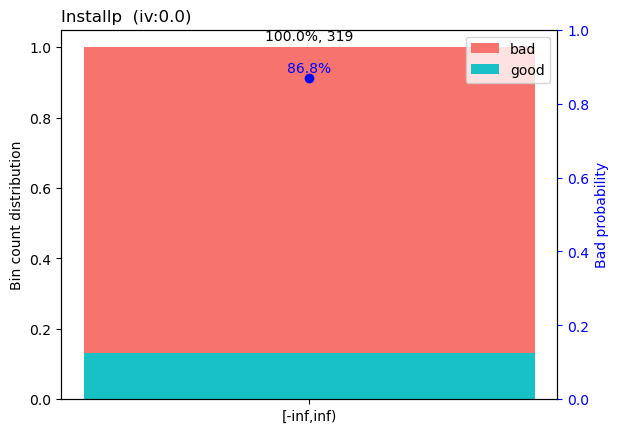

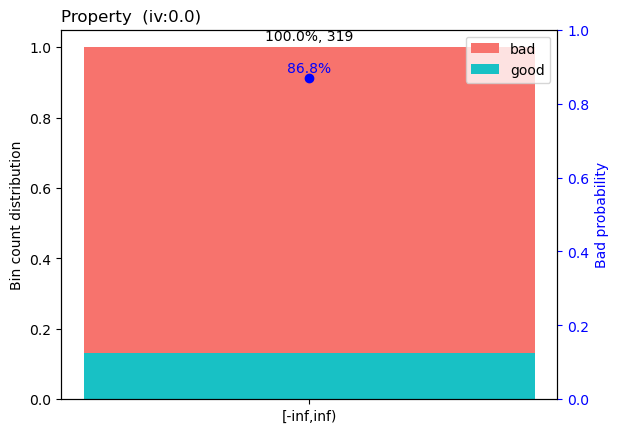

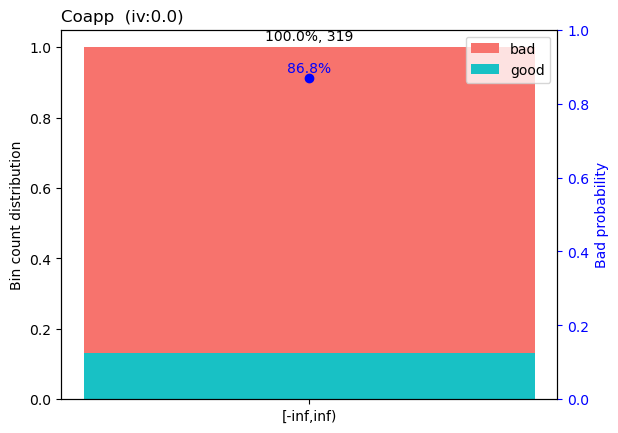

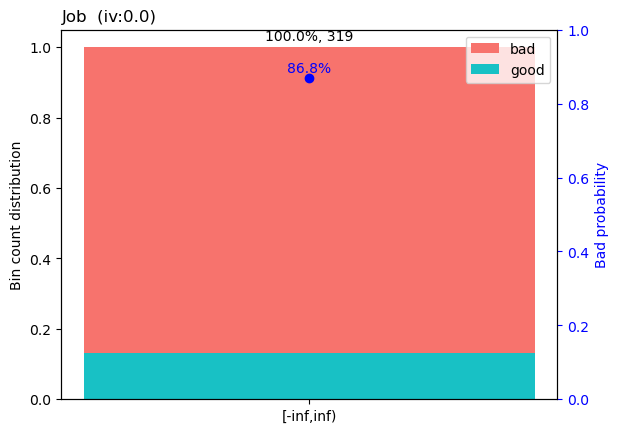

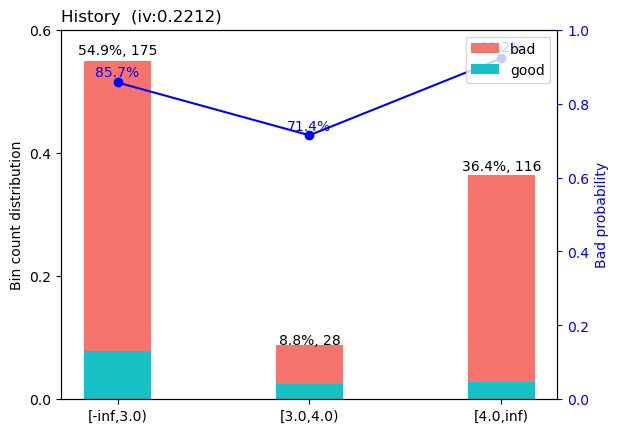

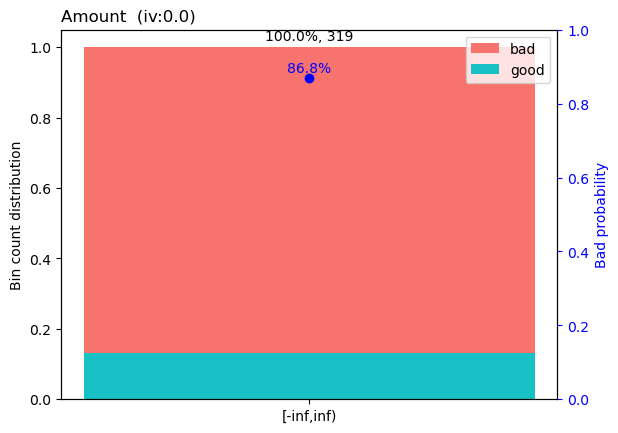

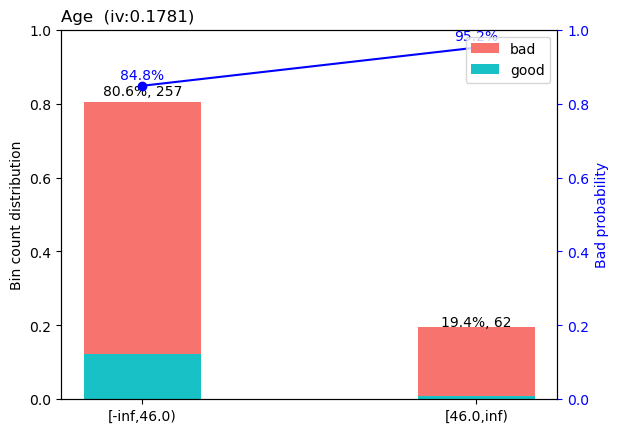

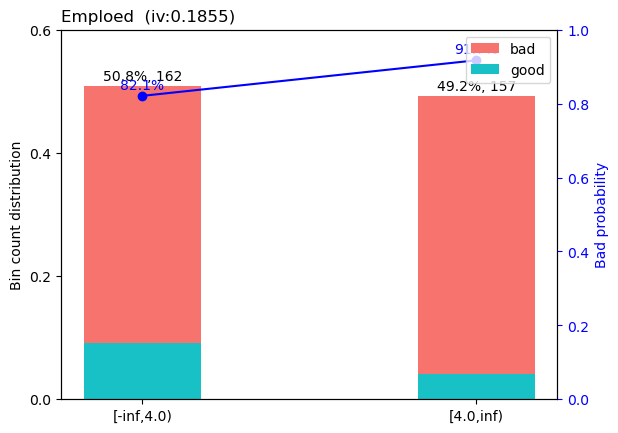

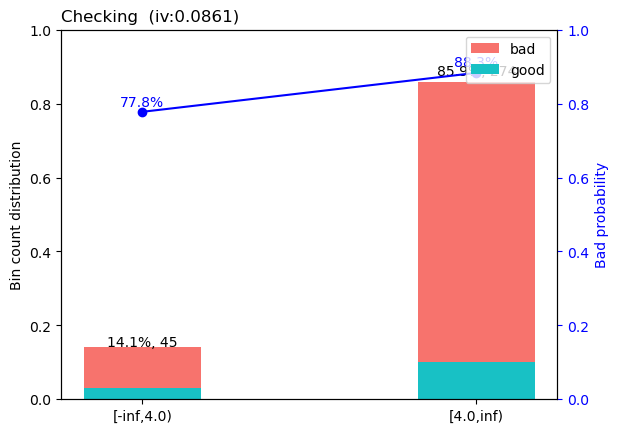

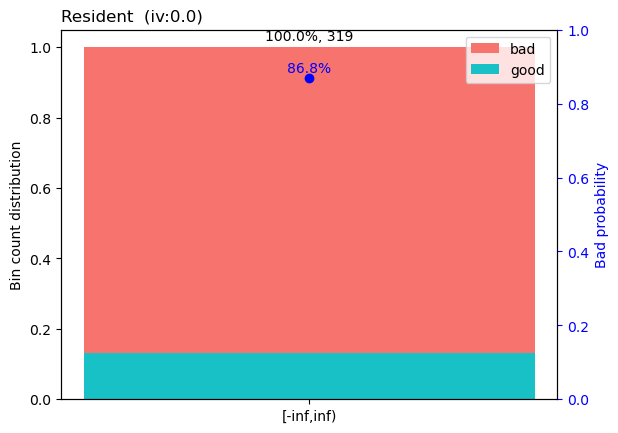

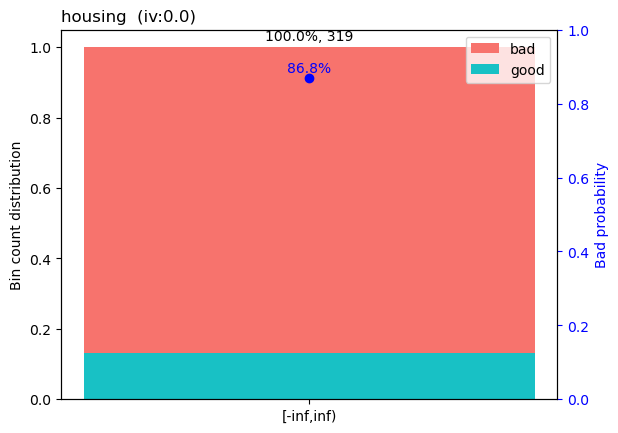

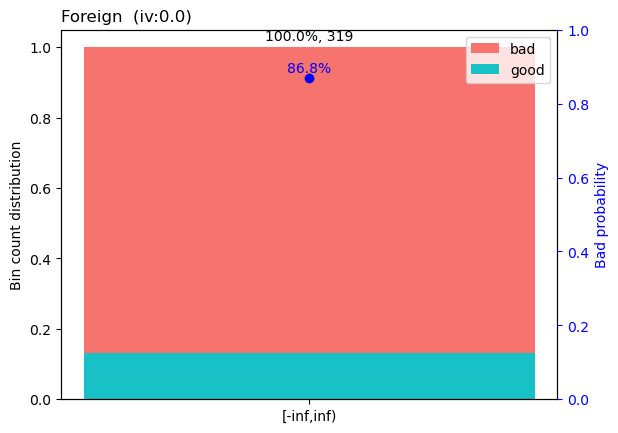

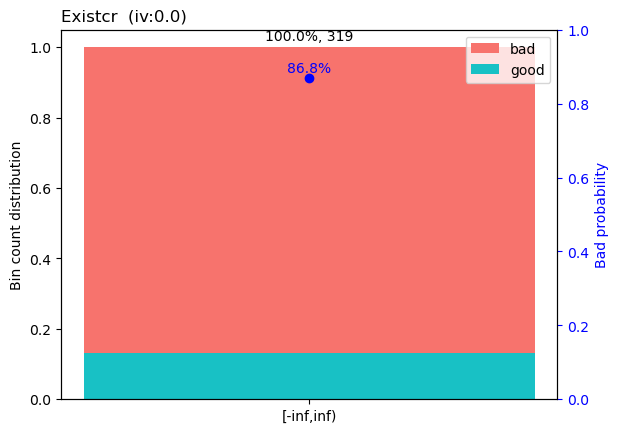

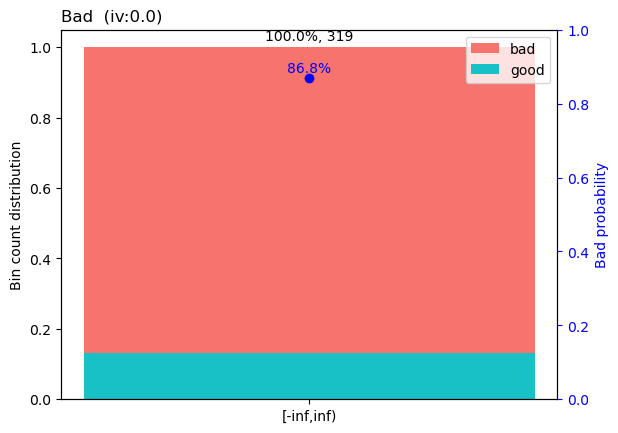

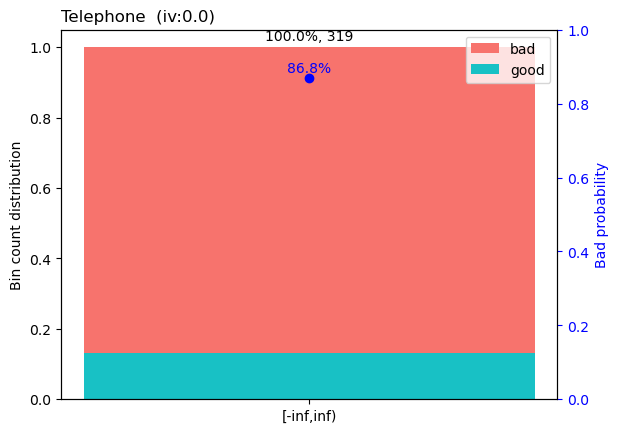

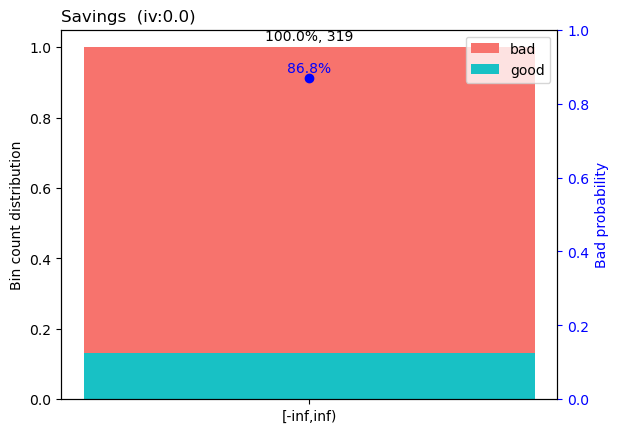

In [43]:
Train34_woe = sc.woebin(Train_34[cols], y="Good", method='chimerge', positive = 1)
sc.woebin_plot(Train34_woe)

In [44]:
sc.iv(Train_12, y= 'Good',positive = 1, order = True).query('info_value > .1')

,variable,info_value
17,Bad,10.544135
10,Age,0.398060
2,Duration,0.384510
20,Savings,0.224780
4,Property,0.220389
18,Purpose,0.182761
8,History,0.182054
1,marital,0.110834


In [45]:
sc.iv(df_12_c, y= 'Good',positive = 1, order = True).query('info_value > .1')

,variable,info_value
17,Bad,11.286350
2,Duration,0.362350
10,Age,0.361369
8,History,0.208973
4,Property,0.207474
20,Savings,0.157166
18,Purpose,0.124889


In [46]:
sc.iv(Train_34, y= 'Good',positive = 1, order = True).query('info_value > .1')

,variable,info_value
17,Bad,9.340587
18,Purpose,0.695647
2,Duration,0.457359
10,Age,0.381495
0,Other,0.304596
8,History,0.289715
11,Emploed,0.244232
9,Amount,0.104367


In [47]:
sc.iv(df_34_c, y= 'Good',positive = 1, order = True).query('info_value > .1')

,variable,info_value
17,Bad,10.111138
2,Duration,0.497100
10,Age,0.388467
18,Purpose,0.377733
0,Other,0.318433
11,Emploed,0.283115
8,History,0.214219


In [48]:
#Train_34.to_excel('Train34.xlsx',sheet_name = 'Checking34')

[INFO] creating woe binning ...


{'Savings': <Figure size 640x480 with 2 Axes>,
 'Property': <Figure size 640x480 with 2 Axes>,
 'History': <Figure size 640x480 with 2 Axes>,
 'Duration': <Figure size 640x480 with 2 Axes>}

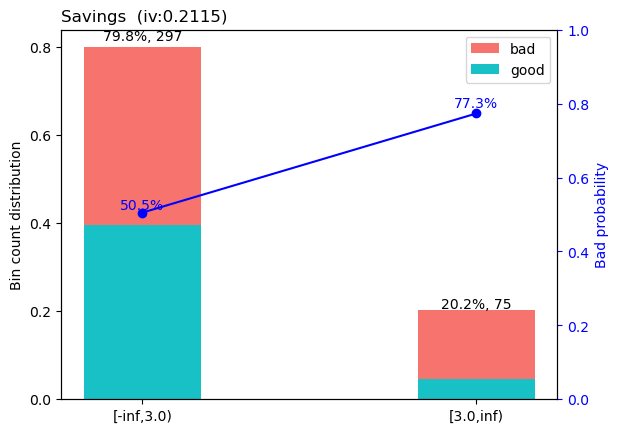

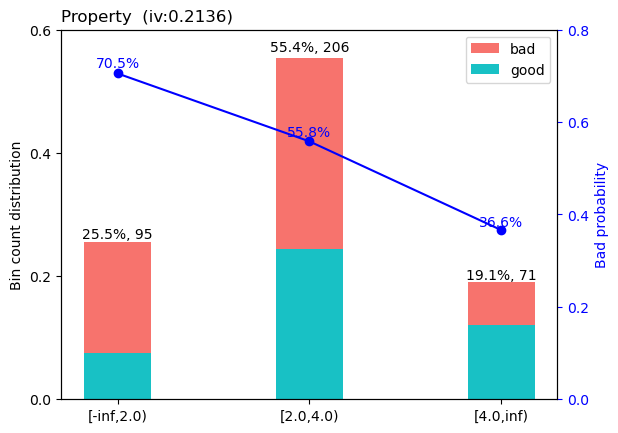

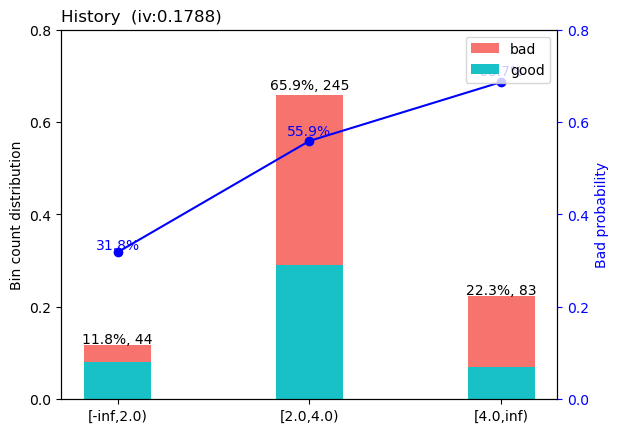

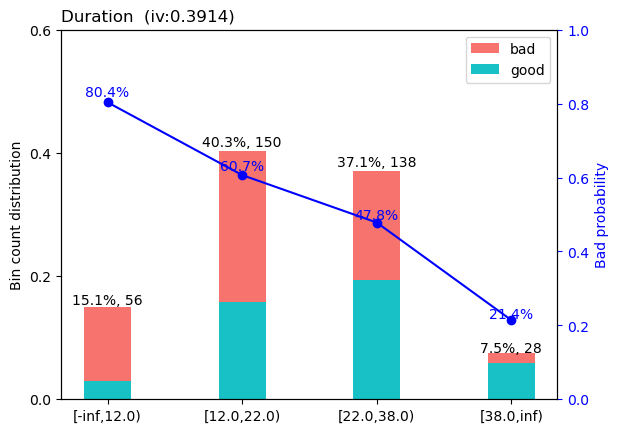

In [49]:
Train12_sub_woe = sc.woebin(Train_12[['Property','Savings',
                                     'History','Duration','Good']], y = 'Good', method = 'chimerge')
sc.woebin_plot(Train12_sub_woe)

In [50]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
def my_mosaic(*args,**kwargs):
    mosaic(kwargs['data'], list(args),
           labelizer=lambda k: '',
           ax=plt.gca())

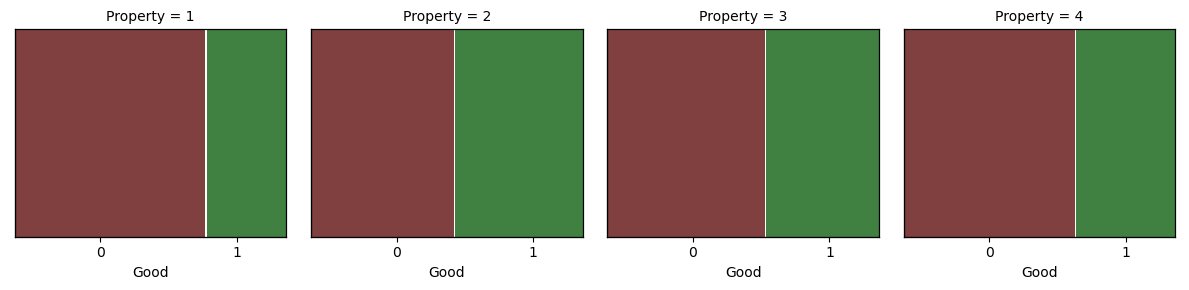

In [51]:
g = sns.FacetGrid(Train_12, col='Property', col_wrap=4)
g = g.map_dataframe(my_mosaic, 'Good')

# Proprety distribution with Good looks similar across each category. So each cane be indidival bin.

95
67
0.7052631578947368


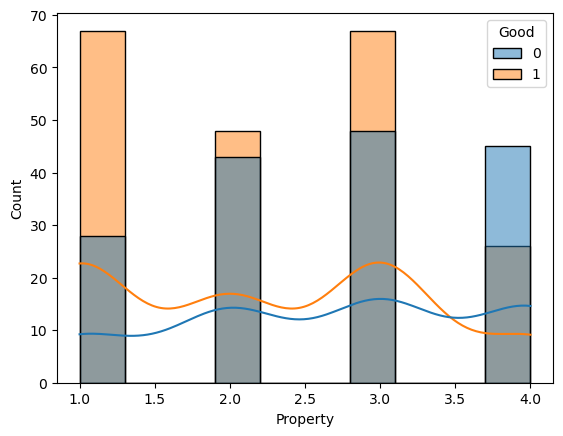

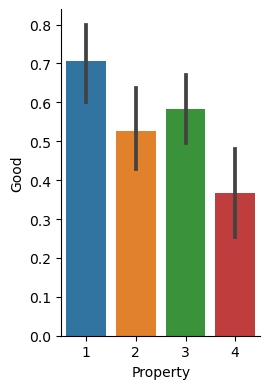

In [52]:
print(len(Train_12.query('Property == 1')))
print(len(Train_12.query('Property == 1 and Good == 1')))
print(67/95)
sns.histplot(Train_12, x = 'Property',hue = 'Good', kde = True)
sns.catplot(x="Property",y="Good",
                data=Train_12, kind="bar",
                height=4, aspect=.7);

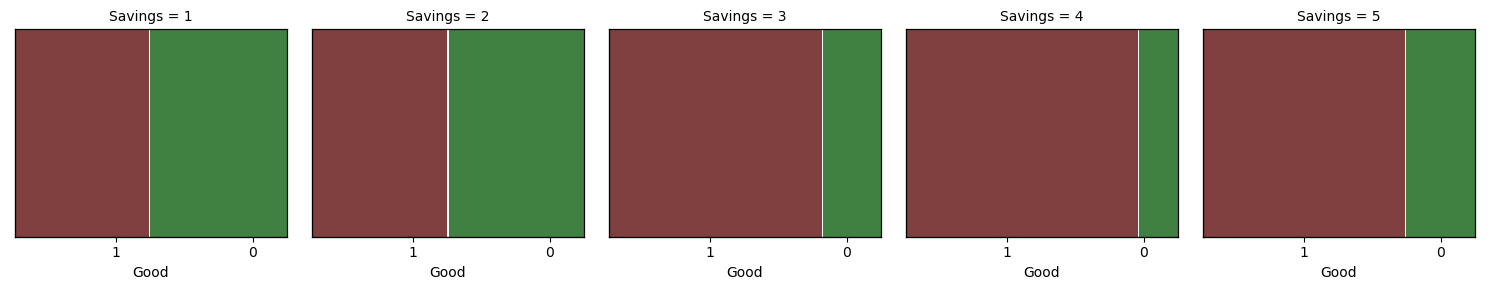

In [53]:
g = sns.FacetGrid(Train_12, col='Savings', col_wrap=5)
g = g.map_dataframe(my_mosaic, 'Good')
# Savings345 combined along with Savings1,2

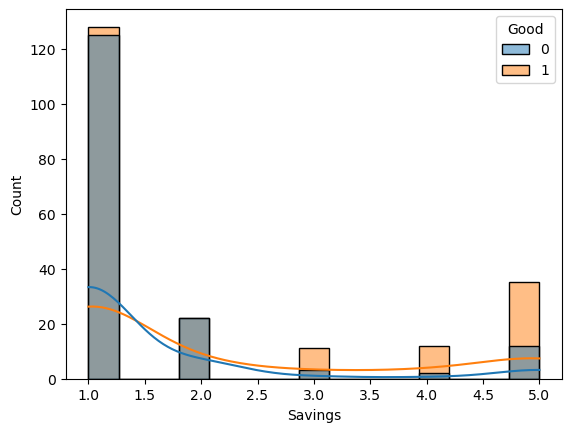

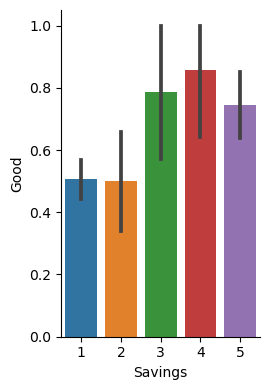

In [54]:
sns.histplot(Train_12, x = 'Savings',hue = 'Good', kde = True)

sns.catplot(x="Savings",y="Good",
                data=Train_12, kind="bar",
                height=4, aspect=.7);

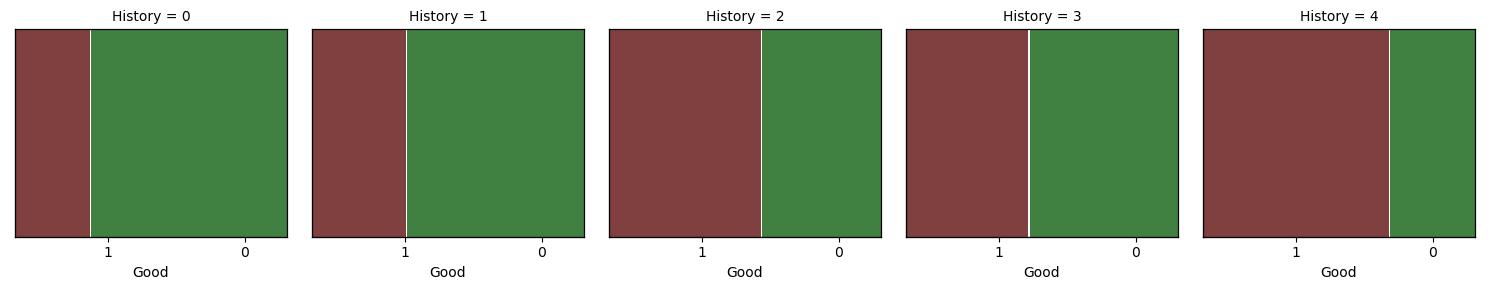

In [55]:
g = sns.FacetGrid(Train_12, col='History', col_wrap=5)
g = g.map_dataframe(my_mosaic, 'Good')

#History01, History23, History4 can be combined - 4 can be dropped

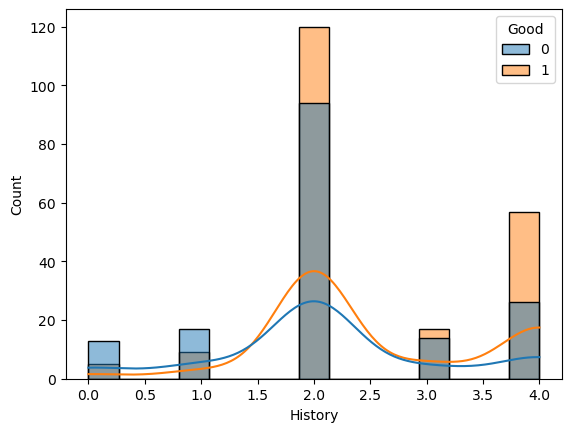

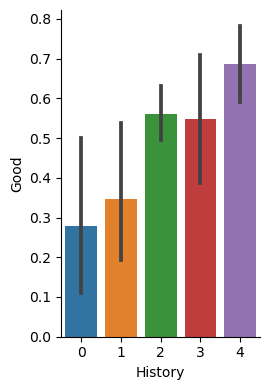

In [56]:
sns.histplot(Train_12, x = 'History',hue = 'Good', kde = True)

sns.catplot(x="History",y="Good",
                data=Train_12, kind="bar",
                height=4, aspect=.7);

In [57]:
def one_hot(df, df_t):
    ohe = OneHotEncoder(sparse = False,handle_unknown = 'ignore')
    df_bin = pd.DataFrame(ohe.fit_transform(df))
    df_bin.columns = ohe.get_feature_names_out()
    df_bin = pd.get_dummies(data = df_bin, drop_first = True)
    frames = [df_bin.reset_index(drop = True), df_t.reset_index(drop = True)]
    return pd.concat(frames, axis = 1)

In [58]:
Train12_ohe = one_hot(Train_12[['History','Property','Savings']], Train_12[['Duration','Good']])#

In [59]:
# Train12 - Binary Columns.

# Train12_ohe['Savings_345'] = Train12_ohe['Savings_3'] + Train12_ohe['Savings_4'] + Train12_ohe['Savings_5']
# Train12_ohe['History_01'] = Train12_ohe['History_0'] + Train12_ohe['History_1']
# Train12_ohe['History_23'] = Train12_ohe['History_2'] + Train12_ohe['History_3']
# Train12_bin = Train12_ohe.drop(labels = ['Savings_3', 'Savings_4','Savings_5', 'History_0', 'History_1',
#                                         'History_2','History_3'],axis = 1)

In [60]:
Train12_ohe['Savings_12'] = Train12_ohe['Savings_1'] + Train12_ohe['Savings_1']
Train12_ohe['Savings_345'] = Train12_ohe['Savings_3'] + Train12_ohe['Savings_4'] + Train12_ohe['Savings_5']
Train12_ohe['History_01'] = Train12_ohe['History_0'] + Train12_ohe['History_1']
Train12_ohe['History_23'] = Train12_ohe['History_2'] + Train12_ohe['History_3']
Train12_ohe['Property_23'] = Train12_ohe['Property_2'] + Train12_ohe['Property_3']
Train12_bin = Train12_ohe.drop(labels = ['Savings_1', 'Savings_2','Savings_3', 'Savings_4','Savings_5', 'History_0', 'History_1',
                                        'History_2','History_3','Property_2','Property_3'],axis = 1)

In [61]:
Train12_bin = Train12_bin[['Property_1','Property_23',
                          'History_01','History_23','Savings_12','Duration','Good']]

In [62]:
Train12_bin.head()

,Property_1,Property_23,History_01,History_23,Savings_12,Duration,Good
0,1.0,0.0,0.0,0.0,0.0,6.0,1
1,0.0,0.0,0.0,1.0,2.0,24.0,0
2,0.0,1.0,0.0,1.0,2.0,36.0,1
3,0.0,1.0,0.0,1.0,2.0,12.0,0
4,0.0,1.0,0.0,1.0,2.0,12.0,1


In [63]:

# Test12_ohe = one_hot(Test_12[['History','Property','Savings']], Test_12[['Duration','Good']])
# Test12_ohe['Savings_345'] = Test12_ohe['Savings_3'] + Test12_ohe['Savings_4'] + Test12_ohe['Savings_5']
# Test12_ohe['History_01'] = Test12_ohe['History_0'] + Test12_ohe['History_1']
# Test12_ohe['History_23'] = Test12_ohe['History_2'] + Test12_ohe['History_3']
# Test12_bin = Test12_ohe.drop(labels = ['Savings_3', 'Savings_4','Savings_5', 'History_0', 'History_1',
#                                         'History_2','History_3'],axis = 1)
# Test12_bin = Test12_bin[['Property_1','Property_2','Property_3',
#                           'History_01','History_23','Savings_1','Savings_2','Duration','Good']]

In [64]:
Test12_ohe = one_hot(Test_12[['History','Property','Savings']], Test_12[['Duration','Good']])
Test12_ohe['Savings_12'] = Test12_ohe['Savings_1'] + Test12_ohe['Savings_2']
Test12_ohe['Savings_345'] = Test12_ohe['Savings_3'] + Test12_ohe['Savings_4'] + Test12_ohe['Savings_5']
Test12_ohe['History_01'] = Test12_ohe['History_0'] + Test12_ohe['History_1']
Test12_ohe['History_23'] = Test12_ohe['History_2'] + Test12_ohe['History_3']
Test12_ohe['Property_23'] = Test12_ohe['Property_2'] + Test12_ohe['Property_3']
Test12_bin = Test12_ohe.drop(labels = ['Savings_1','Savings_2','Savings_3', 'Savings_4','Savings_5', 'History_0', 'History_1',
                                        'History_2','History_3','Property_2','Property_3'],axis = 1)
Test12_bin = Test12_bin[['Property_1','Property_23',
                          'History_01','History_23','Savings_12','Duration','Good']]

In [65]:
Test12_bin.head()

,Property_1,Property_23,History_01,History_23,Savings_12,Duration,Good
0,1.0,0.0,0.0,1.0,1.0,48.0,0
1,0.0,1.0,0.0,1.0,1.0,42.0,1
2,0.0,1.0,0.0,0.0,1.0,30.0,0
3,0.0,1.0,0.0,1.0,1.0,48.0,0
4,0.0,1.0,0.0,0.0,1.0,24.0,0


In [66]:
X_train12 = Train12_bin.iloc[:,0:6]
y_train12 = Train12_bin.iloc[:,6]

X_test12 = Test12_bin.iloc[:,0:6]
y_test12 = Test12_bin.iloc[:,6]

In [67]:
logistic_r = LogisticRegression(penalty='l1', C=1, solver='liblinear', n_jobs=-1)
logistic_r.fit(X_train12, y_train12)

print('Coefficient: ', logistic_r.coef_)
print('Intercept: ', logistic_r.intercept_)

Coefficient:  [[ 0.66764636  0.3489078  -1.07287036 -0.36855672 -0.33068546 -0.04245304]]
Intercept:  [1.60122993]


In [68]:
Train12_pred = logistic_r.predict_proba(X_train12)[:,1]
Test12_pred = logistic_r.predict_proba(X_test12)[:,1]



In [69]:
from sklearn.metrics import mean_absolute_error,confusion_matrix
con_mat1 = confusion_matrix(y_test12,Test12_pred.round())
con_mat1

array([[22, 49],
       [15, 74]], dtype=int64)

In [70]:
sens = con_mat1[0,0]/(con_mat1[0,0] + con_mat1[1,0])
spec = con_mat1[1,1]/(con_mat1[0,1] + con_mat1[1,1])
print('Sensitivity for subset 1 Logistic: ', sens)
print('Specificity for subset 1 Logistic: ', spec)

Sensitivity for subset 1 Logistic:  0.5945945945945946
Specificity for subset 1 Logistic:  0.6016260162601627


In [71]:
X_train12.columns

pd.DataFrame(zip(X_train12.columns, np.transpose(logistic_r.coef_)), columns=['features', 'coefficients']) 

,features,coefficients
0,Property_1,[0.6676463618733286]
1,Property_23,[0.34890780286546946]
2,History_01,[-1.0728703572600538]
3,History_23,[-0.36855672022773234]
4,Savings_12,[-0.3306854644330456]
5,Duration,[-0.04245304170894383]


In [72]:
roc_auc_score(y_train12, Train12_pred) 

0.7164047842401501

In [73]:
auroc = roc_auc_score(y_test12, Test12_pred) 
gini_cof = 2*auroc - 1
print('Gini coefficient for subset 1 Logistic: ', gini_cof)
ks_stat = (con_mat1[1,1]/(con_mat1[0,1] + con_mat1[1,1])) - (con_mat1[1,0]/(con_mat1[0,0] + con_mat1[1,0]))
print('KS statistics value for subset 1 Logistic is: ', abs(ks_stat))



Gini coefficient for subset 1 Logistic:  0.38629529988922284
KS statistics value for subset 1 Logistic is:  0.19622061085475723


In [74]:
data = {}
data.update({'Logistic':{'Sensitivity' : sens, 'Specificity' : spec, 'GINI' : gini_cof, 'KS' : abs(ks_stat)}})



In [75]:
fpr, tpr,_ = roc_curve(y_test12,Test12_pred )

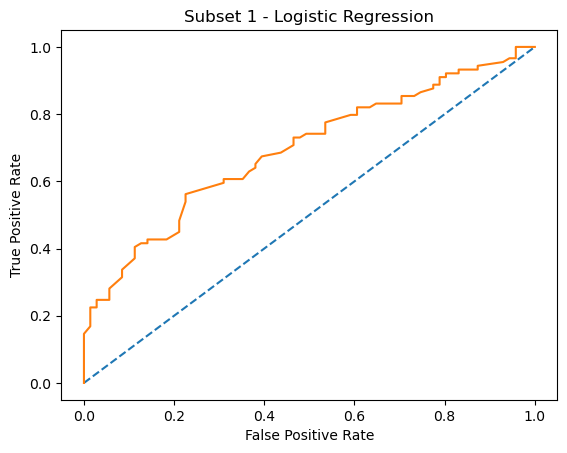

In [76]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Subset 1 - Logistic Regression')
plt.show()

In [77]:
linear_r = LinearRegression()
linear_r.fit(X_train12, y_train12)

print('Coefficient: ', linear_r.coef_)
print('Intercept: ', linear_r.intercept_)

Coefficient:  [ 0.16427911  0.09371405 -0.28931819 -0.11892997 -0.0796804  -0.00957863]
Intercept:  0.8894586323525883


In [78]:
Train12_pred_lr = linear_r.predict(X_train12)
Test12_pred_lr = linear_r.predict(X_test12)

In [79]:
roc_auc_score(y_train12, Train12_pred_lr) 

0.7170497185741088

In [80]:
roc_auc_score(y_test12, Test12_pred_lr) 

0.699636018357335

In [81]:
pd.DataFrame(zip(X_train12.columns, np.transpose(linear_r.coef_)), columns=['features', 'coefficients']) 

,features,coefficients
0,Property_1,0.164279
1,Property_23,0.093714
2,History_01,-0.289318
3,History_23,-0.118930
4,Savings_12,-0.079680
5,Duration,-0.009579


In [82]:
con_mat_1_r = confusion_matrix(y_test12,Test12_pred_lr.round())
print(con_mat_1_r)

[[24 47]
 [15 74]]


In [83]:
sens1 = con_mat_1_r[0,0]/(con_mat_1_r[0,0] + con_mat_1_r[1,0])
spec1 = con_mat_1_r[1,1]/(con_mat_1_r[0,1] + con_mat_1_r[1,1])
print('Sensitivity for subset 1 Linear: ', sens1)
print('Specificity for subset 1 Linear: ', spec1)

Sensitivity for subset 1 Linear:  0.6153846153846154
Specificity for subset 1 Linear:  0.6115702479338843


In [84]:
auroc1 = roc_auc_score(y_test12, Test12_pred_lr) 
gini_cof1 = 2*auroc1 - 1
print('Gini coefficient for subset 1 Linear: ', gini_cof1)
ks_stat1 = (con_mat_1_r[1,1]/(con_mat_1_r[0,1] + con_mat_1_r[1,1])) - (con_mat_1_r[1,0]/(con_mat_1_r[0,0] + con_mat_1_r[1,0]))
print('KS statistics value for subset 1 Linbear is: ', abs(ks_stat1))

Gini coefficient for subset 1 Linear:  0.39927203671467004
KS statistics value for subset 1 Linbear is:  0.22695486331849962


In [85]:
data.update({'Linear':{'Sensitivity' : sens1, 'Specificity' : spec1, 'GINI' : gini_cof1, 'KS' : abs(ks_stat1)}})

In [86]:
df_perf = pd.DataFrame(data)
df_perf

,Logistic,Linear
Sensitivity,0.594595,0.615385
Specificity,0.601626,0.611570
GINI,0.386295,0.399272
KS,0.196221,0.226955


In [87]:
fpr, tpr,_ = roc_curve(y_test12,Test12_pred_lr)

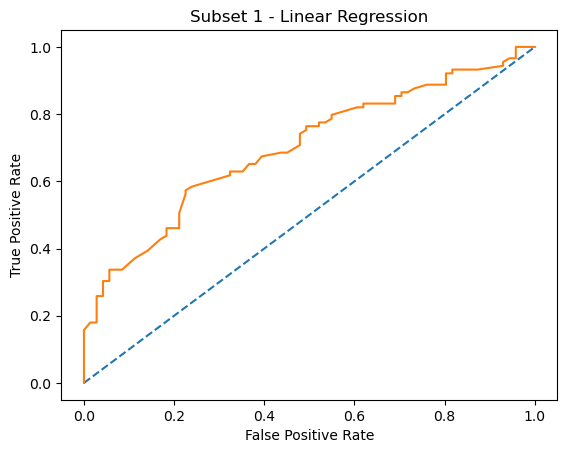

In [88]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Subset 1 - Linear Regression')
plt.show()


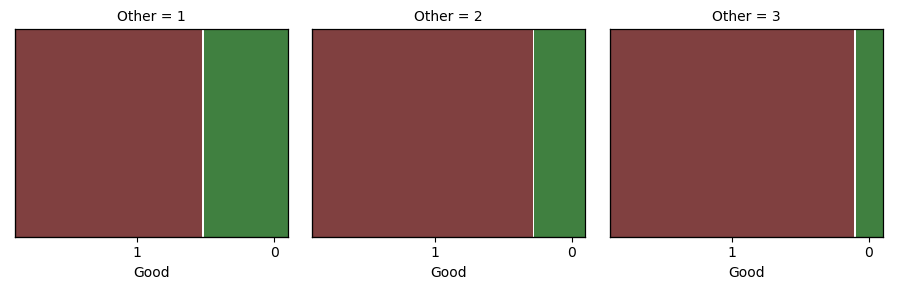

In [89]:
g = sns.FacetGrid(Train_34, col='Other', col_wrap=4)
g = g.map_dataframe(my_mosaic, 'Good')

<AxesSubplot:xlabel='Other', ylabel='Count'>

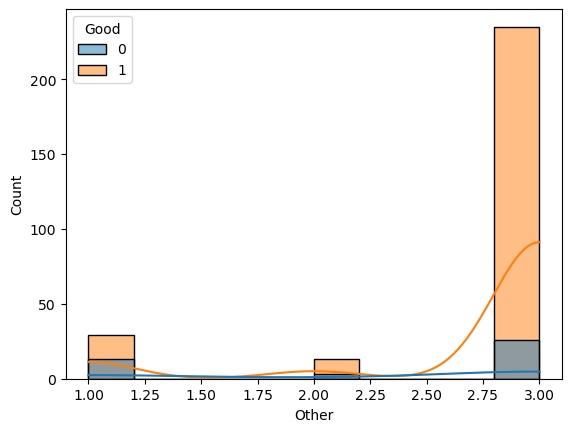

In [90]:
sns.histplot(Train_34, x = 'Other',hue = 'Good', kde = True)

{'Other': <Figure size 640x480 with 2 Axes>}

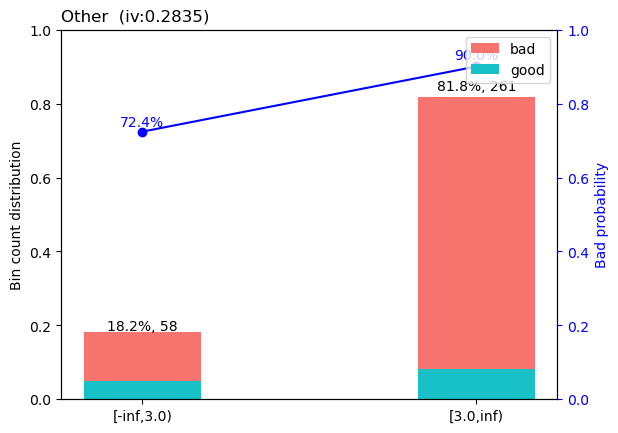

In [91]:
sc.woebin_plot(Train34_woe['Other'])
# Other12, 3 sep.

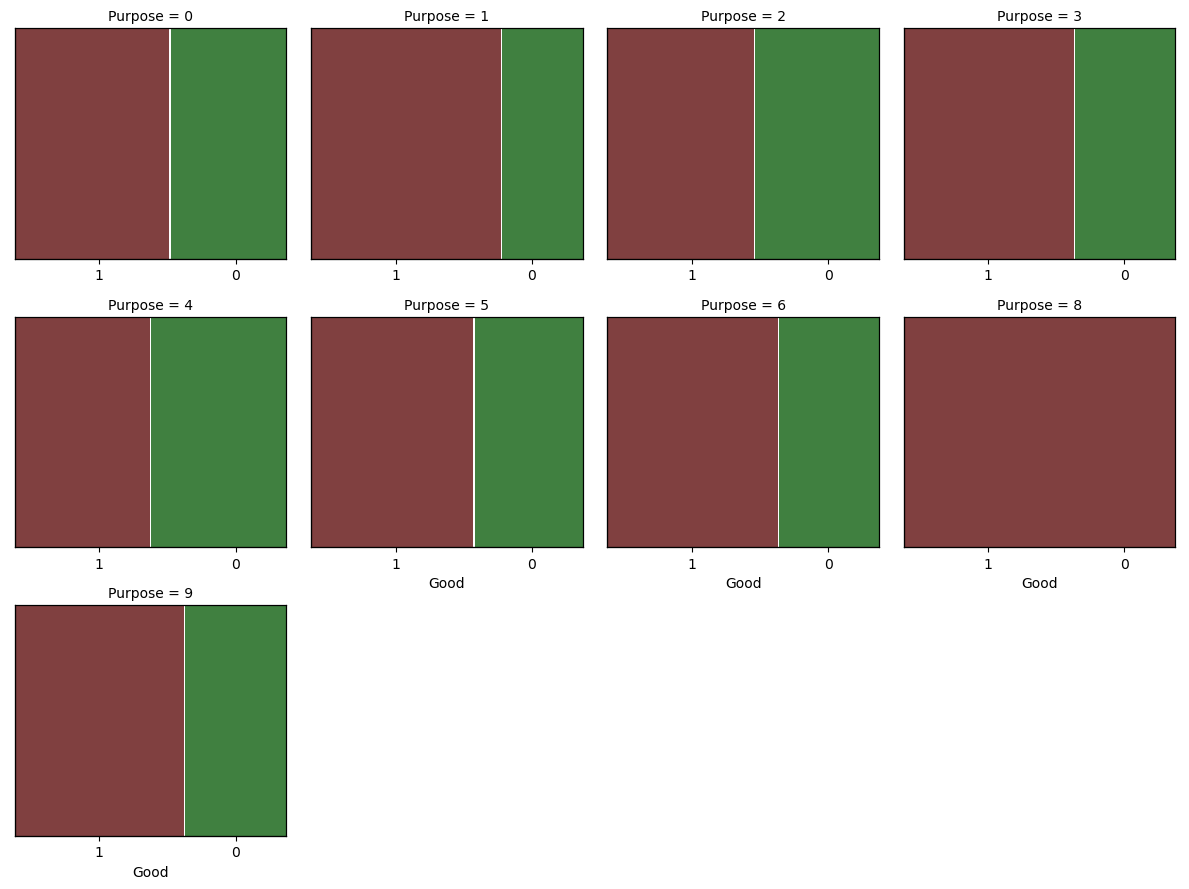

In [92]:
g = sns.FacetGrid(Train_12, col='Purpose', col_wrap=4)
g = g.map_dataframe(my_mosaic, 'Good')

<AxesSubplot:xlabel='Purpose', ylabel='Density'>

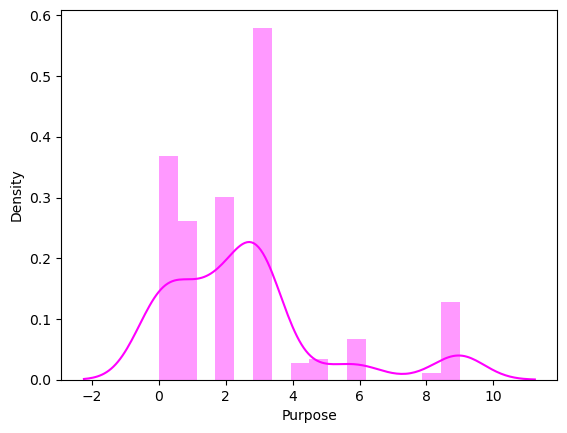

In [93]:
#sns.histplot(Train_34, x = 'Purpose',hue = 'Good', kde = True)
sns.distplot(Train_34.Purpose, color = 'Magenta')
# P0,1,2,3, p45689

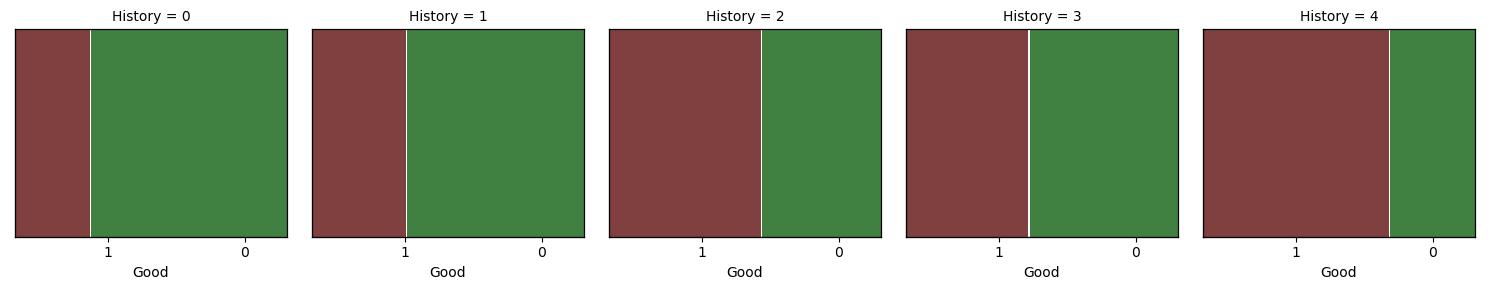

In [94]:
g = sns.FacetGrid(Train_12, col='History', col_wrap=5)
g = g.map_dataframe(my_mosaic, 'Good')

<AxesSubplot:xlabel='History', ylabel='Count'>

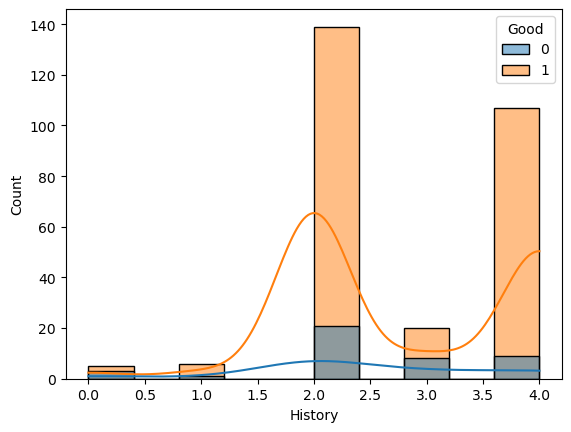

In [95]:
sns.histplot(Train_34, x = 'History',hue = 'Good', kde = True)

{'History': <Figure size 640x480 with 2 Axes>}

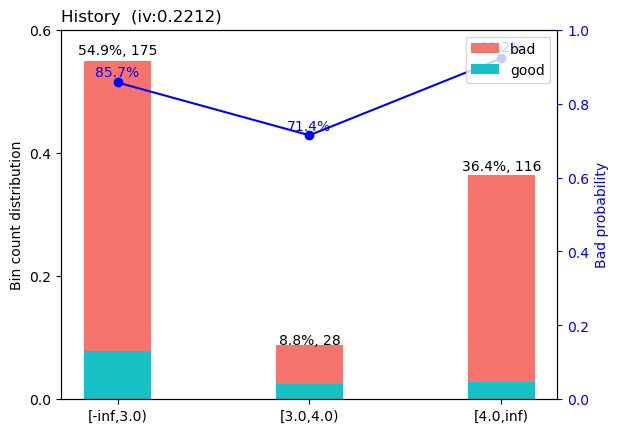

In [96]:
sc.woebin_plot(Train34_woe['History'])
# History0123,4

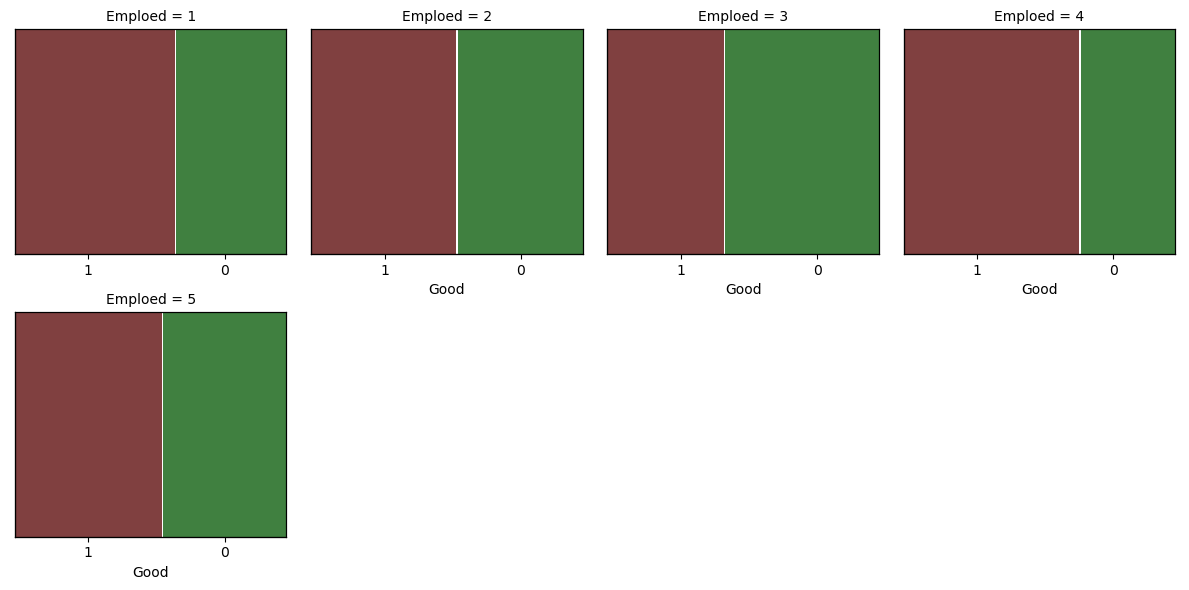

In [97]:
g = sns.FacetGrid(Train_12, col='Emploed', col_wrap=4)
g = g.map_dataframe(my_mosaic, 'Good')

<AxesSubplot:xlabel='Emploed', ylabel='Count'>

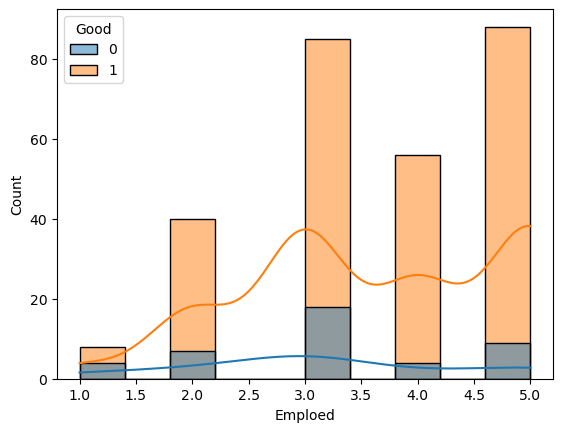

In [98]:
sns.histplot(Train_34, x = 'Emploed',hue = 'Good', kde = True)

{'Emploed': <Figure size 640x480 with 2 Axes>}

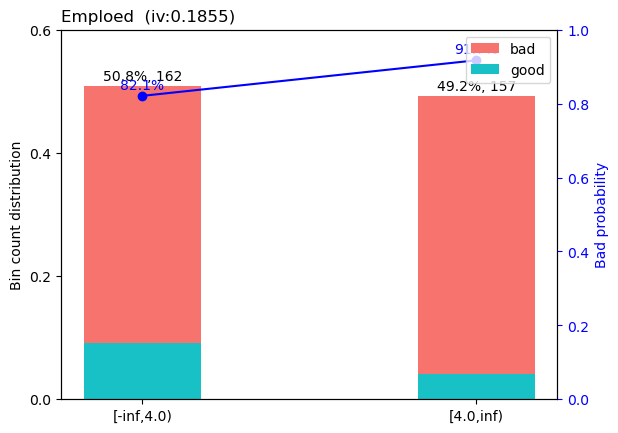

In [99]:
sc.woebin_plot(Train34_woe['Emploed'])
# emp123, emp4, emp5

In [100]:
#Train34_ohe = one_hot(Train_34[['Other','Emploed','History','Purpose']], Train_34[['Good']])
#Train34_ohe['Other_12'] = Train34_ohe['Other_1'] + Train34_ohe['Other_2']
#Train34_ohe['Emploed_123'] = Train34_ohe['Emploed_1'] + Train34_ohe['Emploed_2'] + Train34_ohe['Emploed_3']
#Train34_ohe['History_0123'] = Train34_ohe['History_0'] + Train34_ohe['History_1'] + Train34_ohe['History_2'] + Train34_ohe['History_3']
#Train34_ohe['Purpose_4to9'] = Train34_ohe['Purpose_4'] + Train34_ohe['Purpose_5'] + Train34_ohe['Purpose_6'] + Train34_ohe['Purpose_8'] + Train34_ohe['Purpose_9']      
#Train34_bin = Train34_ohe.drop(labels = ['Other_1','Other_2','Emploed_1','Emploed_2','Emploed_3',
 #                                       'History_0','History_1','History_2','History_3', 'Purpose_4',
  #                                      'Purpose_5','Purpose_6','Purpose_8','Purpose_9'], axis = 1)
#Train34_bin = Train34_bin[['Emploed_123','Emploed_4','Emploed_5','History_0123','History_4','Purpose_0','Purpose_1','Purpose_2',
 #                         'Purpose_3','Purpose_4to9','Other_12','Other_3','Good']]	

In [101]:
Train34_ohe = one_hot(Train_34[['Other','Emploed','History','Purpose']], Train_34[['Good']])
Train34_bin = Train34_ohe

In [102]:
Train34_bin

,Other_1,Other_2,Other_3,Emploed_1,Emploed_2,Emploed_3,Emploed_4,Emploed_5,History_0,History_1,...,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_8,Purpose_9,Good
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
315,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
317,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [103]:
#Test34_ohe = one_hot(Test_34[['Other','Emploed','History','Purpose']], Test_34[['Good']])
#Test34_ohe['Other_12'] = Test34_ohe['Other_1'] + Test34_ohe['Other_2']
#Test34_ohe['Emploed_123'] = Test34_ohe['Emploed_1'] + Test34_ohe['Emploed_2'] + Test34_ohe['Emploed_3']
#Test34_ohe['History_0123'] = Test34_ohe['History_0'] + Test34_ohe['History_1'] + Test34_ohe['History_2'] + Test34_ohe['History_3']
#Test34_ohe['Purpose_4to9'] =   Test34_ohe['Purpose_5'] + Test34_ohe['Purpose_6'] + Test34_ohe['Purpose_8'] + Test34_ohe['Purpose_9']      
#Test34_bin = Test34_ohe.drop(labels = ['Other_1','Other_2','Emploed_1','Emploed_2','Emploed_3',
 #                                       'History_0','History_1','History_2','History_3',
 #                                       'Purpose_5','Purpose_6','Purpose_8','Purpose_9'], axis = 1)
#Test34_bin = Test34_bin[['Emploed_123','Emploed_4','Emploed_5','History_0123','History_4','Purpose_0','Purpose_1','Purpose_2',
 #                         'Purpose_3','Purpose_4to9','Other_12','Other_3','Good']]

In [104]:
Test34_ohe = one_hot(Test_34[['Other','Emploed','History','Purpose']], Test_34[['Good']])
Test34_bin = Test34_ohe

In [105]:
Test34_bin

,Other_1,Other_2,Other_3,Emploed_1,Emploed_2,Emploed_3,Emploed_4,Emploed_5,History_0,History_1,...,History_4,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_5,Purpose_6,Purpose_8,Purpose_9,Good
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
133,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
134,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
135,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [106]:
X_train34 = Train34_bin.iloc[:,0:21]
y_train34 = Train34_bin.iloc[:,21]

X_test34 = Test34_bin.iloc[:,0:21]
y_test34 = Test34_bin.iloc[:,21]

In [107]:
logistic_r34 = LogisticRegression(penalty='l1', C=.9, solver='saga')
logistic_r34.fit(X_train34, y_train34)

print('Coefficient: ', logistic_r34.coef_)
print('Intercept: ', logistic_r34.intercept_)
#logistic_r34 = LogisticRegression(penalty='l1', C=.8, solver='saga')
#logistic_r34 = LogisticRegression(penalty='l1', C=.2, solver='saga') - okish 

Coefficient:  [[ 0.          0.         -0.65801343  0.          0.          0.
   0.14097246  0.          0.          0.          0.          0.69016935
   0.         -4.33161056 -4.01629275 -4.07992237 -4.75209377 -1.27636511
  -1.65713191 -2.48727935  0.        ]]
Intercept:  [0.65379952]


In [108]:
Train34_pred = logistic_r34.predict_proba(X_train34)[:,1]
Test34_pred = logistic_r34.predict_proba(X_test34)[:,1]

In [109]:
roc_auc_score(y_train34, Train34_pred) 

0.9995593419506462

In [110]:
roc_auc_score(y_test34, Test34_pred) 

0.37324929971988796

In [111]:
fpr, tpr,_ = roc_curve(y_test34,Test34_pred )

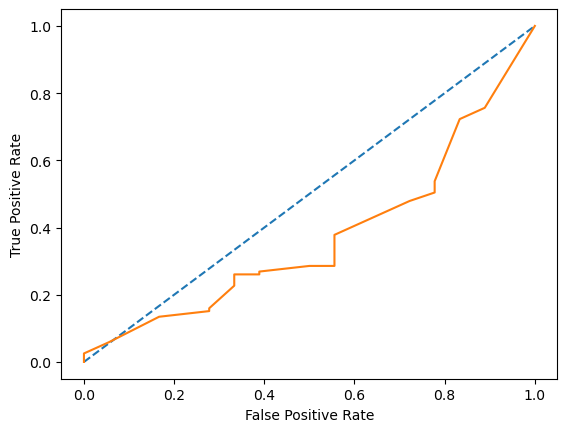

In [112]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [113]:
from sklearn.feature_selection import chi2
import operator
def cal_chi2(dFrame, target_val):
  chi2_vals = dict()
  for i in X_cols:
    chi2_val, p_val = chi2(np.array(dFrame[i]).reshape(-1, 1), np.array(target_val).reshape(-1, 1))
    chi2_vals[i] = p_val
  return sorted(chi2_vals.items(), key = operator.itemgetter(1), reverse = False)

In [114]:
cal_chi2(Train_12[X_cols], Train_12['Good'])

[('Amount', array([0.])),
 ('Duration', array([2.29951893e-38])),
 ('Savings', array([7.26267213e-05])),
 ('Property', array([0.00983337])),
 ('Purpose', array([0.01080929])),
 ('History', array([0.01311133])),
 ('Age', array([0.0972645])),
 ('Installp', array([0.14733156])),
 ('marital', array([0.18131211])),
 ('Checking', array([0.28406567])),
 ('Coapp', array([0.44361837])),
 ('Existcr', array([0.50896899])),
 ('Job', array([0.6102941])),
 ('Telephone', array([0.64302528])),
 ('Emploed', array([0.66617569])),
 ('Foreign', array([0.6688658])),
 ('Other', array([0.75761476])),
 ('housing', array([0.88616424])),
 ('Resident', array([0.95883259])),
 ('Depends', array([1.]))]

In [115]:
cal_chi2(Train_34[X_cols], Train_34['Good'])

[('Amount', array([4.47403655e-77])),
 ('Purpose', array([0.00017981])),
 ('Age', array([0.0010098])),
 ('Duration', array([0.03566163])),
 ('Other', array([0.10967833])),
 ('Emploed', array([0.1343065])),
 ('Savings', array([0.16110408])),
 ('History', array([0.22240522])),
 ('Installp', array([0.50151399])),
 ('Property', array([0.62961465])),
 ('Telephone', array([0.72364014])),
 ('Checking', array([0.73120862])),
 ('marital', array([0.74179679])),
 ('Resident', array([0.77912382])),
 ('Foreign', array([0.79730715])),
 ('Existcr', array([0.81436232])),
 ('housing', array([0.85862701])),
 ('Coapp', array([0.85972346])),
 ('Job', array([0.97173163])),
 ('Depends', array([1.]))]

<AxesSubplot:>

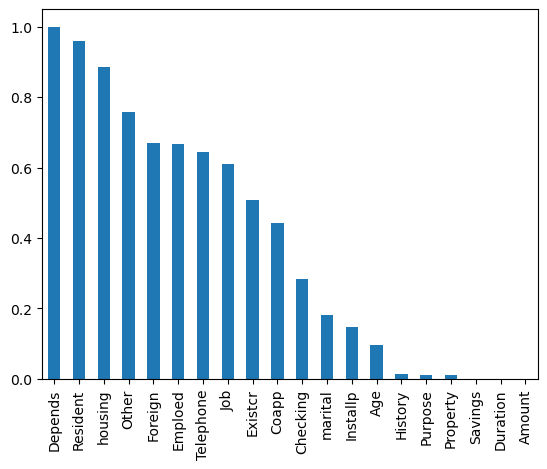

In [116]:
chi_scores = chi2(Train_12[X_cols], Train_12['Good'])
p_values = pd.Series(chi_scores[1],index = X_cols)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()


In [117]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_values = dict()

formula = 'Good ~ Property+Savings+History+Duration'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values['Property+Savings+History+Duration'] = fit.rsquared

formula = 'Good ~ Property+Savings+History+housing'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values['Property+Savings+History+housing'] = fit.rsquared

formula = 'Good ~ Property+Savings+History+Checking'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values['Property+Savings+History+Checki'] = fit.rsquared

formula = 'Good ~ Property+Savings+History+marital'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values['Property+Savings+History+marital'] = fit.rsquared

formula = 'Good ~ Property+Savings+History+Age'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values['Property+Savings+History+Age'] = fit.rsquared

formula = 'Good ~ Property+Savings+History+Amount'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values['Property+Savings+History+Amount'] = fit.rsquared

max(reg_values, key = reg_values.get)

'Property+Savings+History+Duration'

In [118]:
print(reg_values)

{'Property+Savings+History+Duration': 0.14188372014412454, 'Property+Savings+History+housing': 0.12147383093905717, 'Property+Savings+History+Checki': 0.12240717638761445, 'Property+Savings+History+marital': 0.12196083638364352, 'Property+Savings+History+Age': 0.11591102580348156, 'Property+Savings+History+Amount': 0.11558028599967807}


In [119]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

reg_values_2 = dict()

formula = 'Good ~ Purpose+Other+History+Emploed'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values_2['Purpose+Other+History+Emploe'] = fit.rsquared

formula = 'Good ~ Purpose+Other+History+Amount'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values_2['Purpose+Other+History+Amount'] = fit.rsquared

formula = 'Good ~ Purpose+Other+History+Age'
fit = sm.OLS.from_formula(formula, df_12_c).fit()
reg_values_2['Purpose+Other+History+Age'] = fit.rsquared



max(reg_values_2, key = reg_values_2.get)

'Purpose+Other+History+Amount'

In [120]:
reg_values_2

{'Purpose+Other+History+Emploe': 0.08226031385983801,
 'Purpose+Other+History+Amount': 0.0879790029383577,
 'Purpose+Other+History+Age': 0.08227015591455822}

In [121]:
def heat_map_func(dFrame):
  matrix = np.triu(dFrame.corr())
  fig, ax = plt.subplots(figsize=(6,6))
  sns.heatmap(dFrame.corr(), annot=True, ax=ax, fmt='.2g', vmin=-1, vmax=1, center= 0, cmap='bwr')
  plt.show()

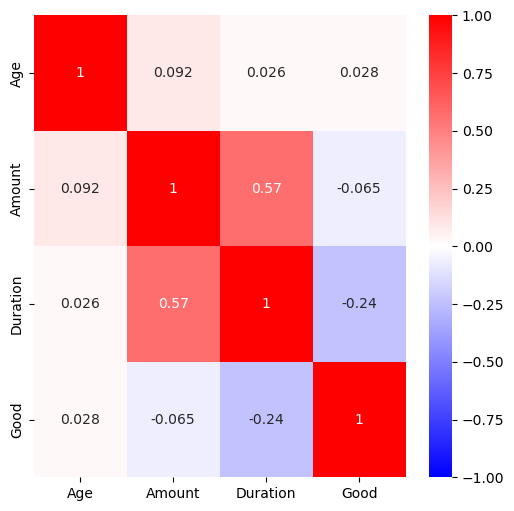

In [122]:
heat_map_func(df_12_c[['Age','Amount','Duration','Good']])

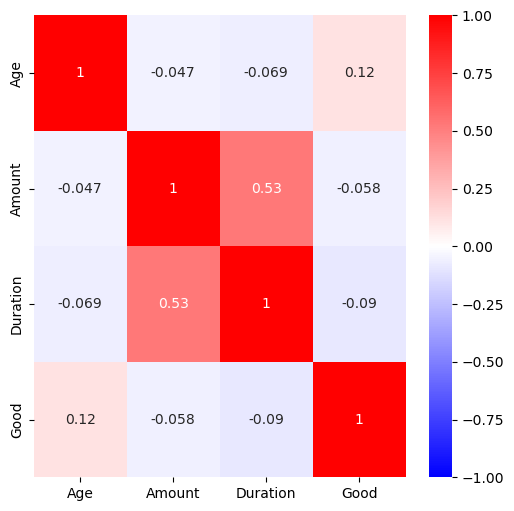

In [123]:
heat_map_func(df_34_c[['Age','Amount','Duration','Good']])

In [124]:
df_34_c[['Age','Amount','Duration','Good']].corr()

,Age,Amount,Duration,Good
Age,1.000000,-0.046957,-0.069389,0.115461
Amount,-0.046957,1.000000,0.526199,-0.058433
Duration,-0.069389,0.526199,1.000000,-0.089993
Good,0.115461,-0.058433,-0.089993,1.000000
